## 포트로 세구로 안전 운전자 예측 경진대회
* https://www.kaggle.com/c/porto-seguro-safe-driver-prediction


### 데이터 확인

브라질의 최대규모 자동차, 주택 보험 회사인 포르토 세구로는 보다 정확한 안전한 운전자 예측 모델을 통하여 자사 고객에게 합리적인 보험을 청구하고자 노력합니다. 이번 경진 대회에 사용된 데이터는 세구로 고객 데이터로 60만명의 고객 데이터를 기반으로 얼마나 정교한 예측 모델을 개발하는 것이 목표입니다.

경진 대회의 목적 운전자 A가 내년에 보험을 청구할 확률은?

### 평가 척도
지니 계수(Gini Coefficient)
![Gini_coeff.png](./Gini_coeff.png)
모든 경제 인구를 소득 순으로 정렬한 후에 누적 소득합을 그린 그래프를 로렌츠 곡선
![Gini_coeff_2.jpg](./Gini_coeff_2.jpg)
![Gini_coeff_3.jpg](./Gini_coeff_3.png)
S 이미 발생한 사건의 모음 c 사건의 개수

* 숙제
1. ROC곡선 의미 
2. 정밀도와 정확도 차이점
3. F-1 measure  
이해해서 설명하기!

## 데이터 살펴보기

In [2]:
import pandas as pd
import numpy as np

trn = pd.read_csv('train.csv', na_values=['-1','-1.0'])
tst = pd.read_csv('test.csv', na_values=['-1','-1.0'])
#na_values로 표시한 리스트 형태로 이상치 값을 전해주면 자동으로 nan값으로 변경해줌

In [3]:
# 데이터의 크기를 확인한다
print(trn.shape, tst.shape)

(595212, 59) (892816, 58)


In [4]:
# 데이터 첫 5줄을 확인한다
trn.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


### 이번 대회와 데이터의 특징
철저하게 모든 데이터가 익명화 되어 있으며 각 변수가 어떤 의미인지 주어지지 않음, 각 변수간의 관계도 모름 단순히 숫자만 제시함

In [5]:
# 데이터프레임에 대한 메타 정보를 확인한다
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   594996 non-null  float64
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595129 non-null  float64
 6   ps_ind_05_cat   589403 non-null  float64
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [6]:
# 타겟 변수의 고유값과 타겟==1의 비율을 계산한다
print(np.unique(trn['target']))
print(1.0 * sum(trn['target'])/trn.shape[0])

[0 1]
0.036447517859182946


보험 청구 여부는 0과 1로 분류됨, 그중 3.6%의 운전자만 보험을 청구함 -> 데이터가 불균형함  
데이터가 불균형할때 문제는?

In [9]:
# 그 외 기초 통계 기법
# 변수의 최대값, 최소값 등을 확인한다
trn.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,594996.000000,595212.000000,595129.000000,589403.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.359799,4.423318,0.416992,0.419038,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.663193,2.699902,0.493062,1.350023,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# 변수의 결측값을 확인한다
trn.isnull().sum(axis=0)

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


In [13]:
tst.isnull().sum(axis=0)

id                     0
ps_ind_01              0
ps_ind_02_cat        307
ps_ind_03              0
ps_ind_04_cat        145
ps_ind_05_cat       8710
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         161684
ps_car_01_cat        160
ps_car_02_cat          5
ps_car_03_cat     616911
ps_car_04_cat          0
ps_car_05_cat     400359
ps_car_06_cat          0
ps_car_07_cat      17331
ps_car_08_cat          0
ps_car_09_cat        877
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              1
ps_car_12              0
ps_car_13              0
ps_car_14          63805
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


## 시각화로 데이터 살펴 보기

In [14]:
# 훈련 데이터와 테스트 데이터를 통합한다
tst['target'] = np.nan
df = pd.concat([trn, tst], axis=0)

In [15]:
# 시각화 관련 라이브러리를 불러온다
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
# 시각화 관련 함수를 미리 정의한다
def bar_plot(col, data, hue=None):
    f, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(x=col, hue=hue, data=data, alpha=0.5)
    plt.show()
    
def dist_plot(col, data):
    f, ax = plt.subplots(figsize=(10, 5))
    sns.distplot(data[col].dropna(), kde=False, bins=10)
    plt.show()
    
def bar_plot_ci(col, data):
    f, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(x=col, y='target', data=data)
    plt.show()

In [17]:
# 분석의 편의를 위해 변수 유형별로 구분한다
# 이진 변수
binary = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
          'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 
          'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
# 범주형 변수
category = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 
            'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 
            'ps_car_10_cat', 'ps_car_11_cat']
# 정수형 변수
integer = ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 
           'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 
           'ps_calc_14', 'ps_car_11']
# 소수형 변수
floats = ['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_car_12', 'ps_car_13',
          'ps_car_14', 'ps_car_15']

### 단일 변수 히스토그램

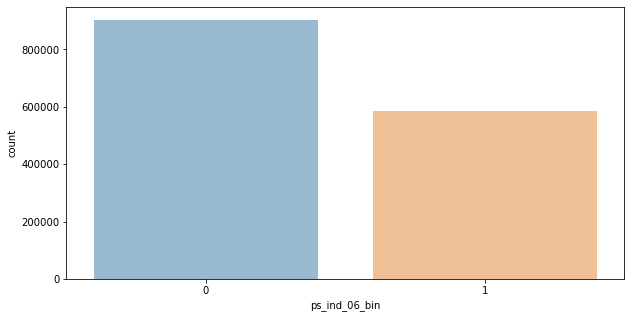

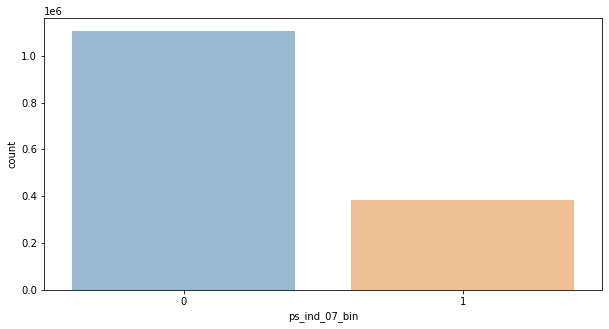

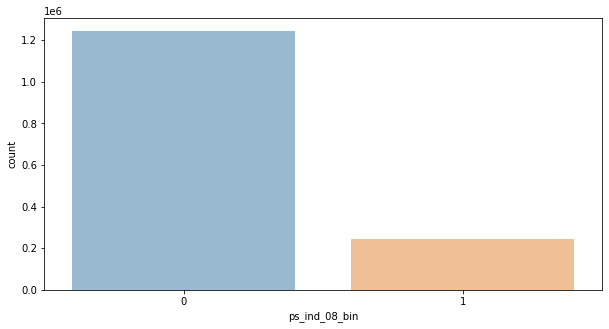

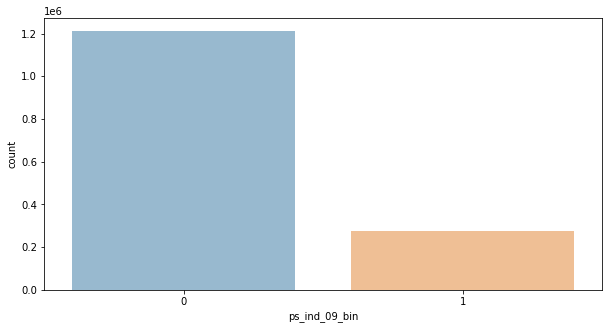

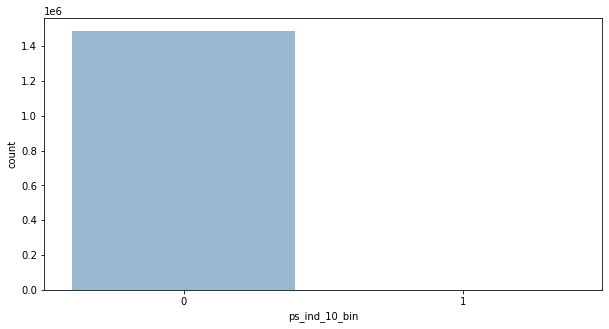

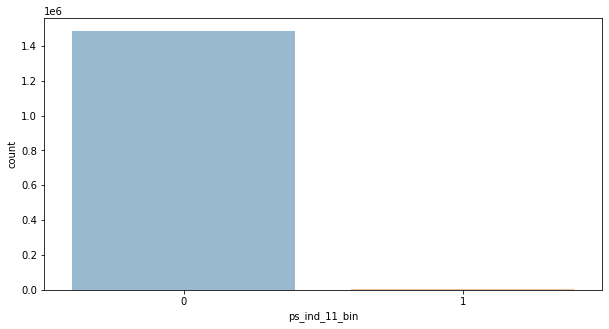

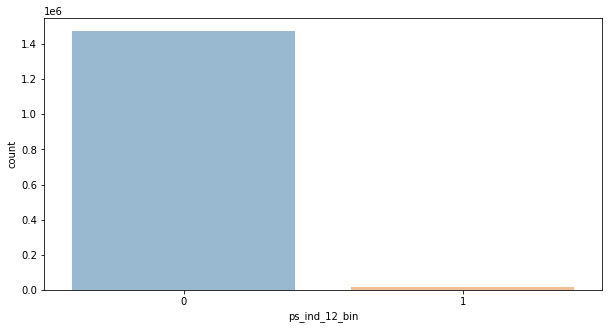

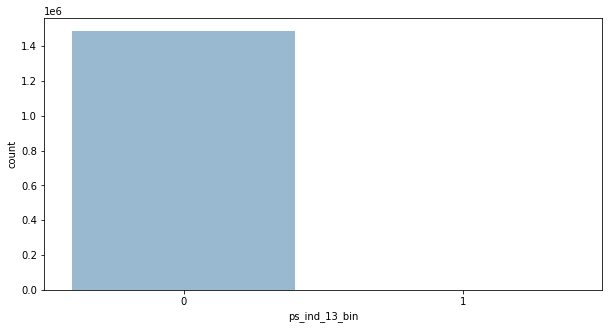

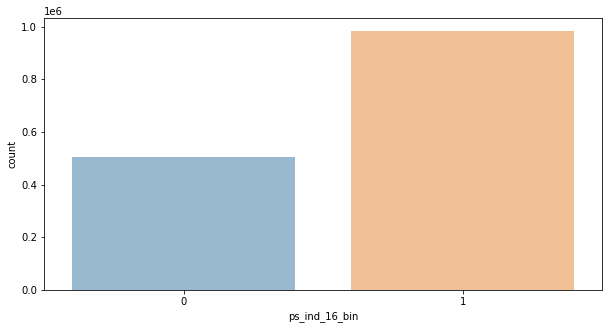

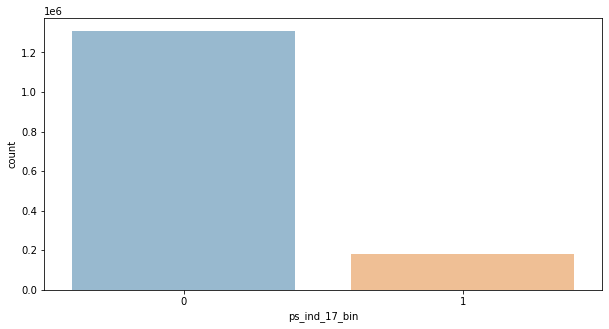

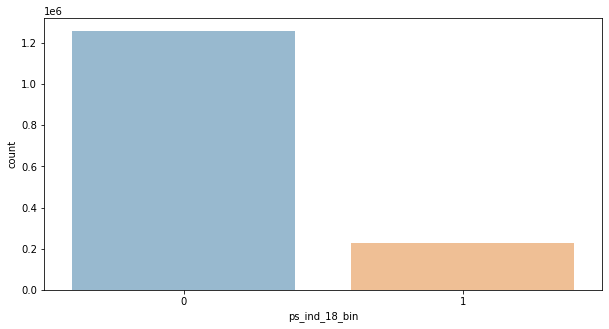

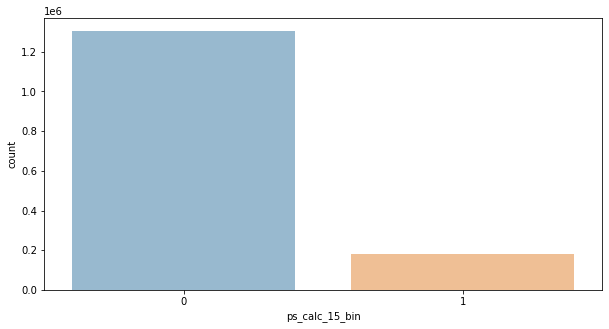

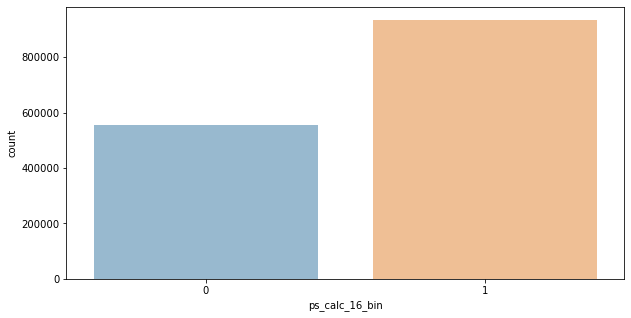

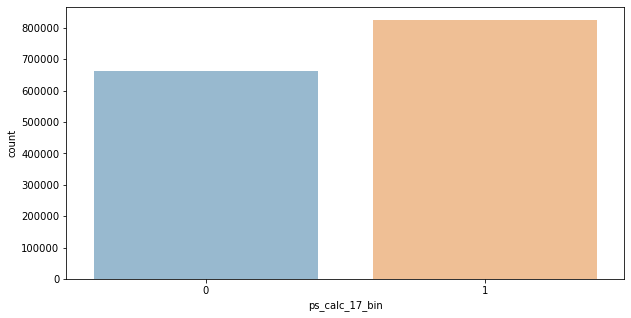

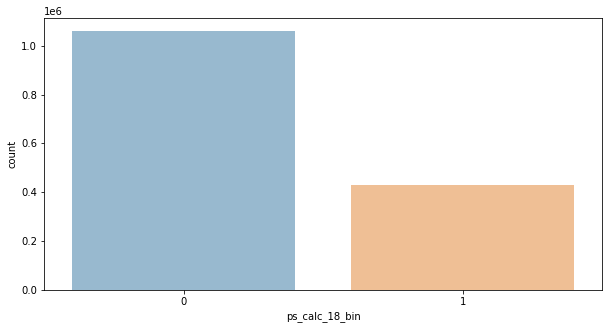

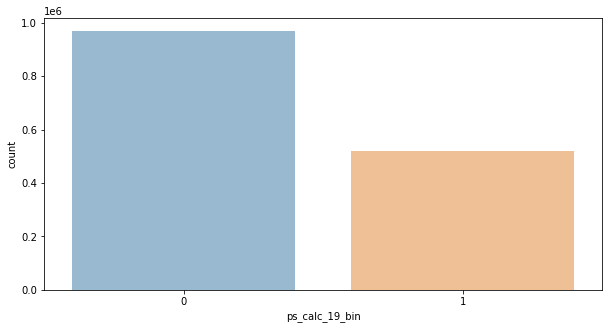

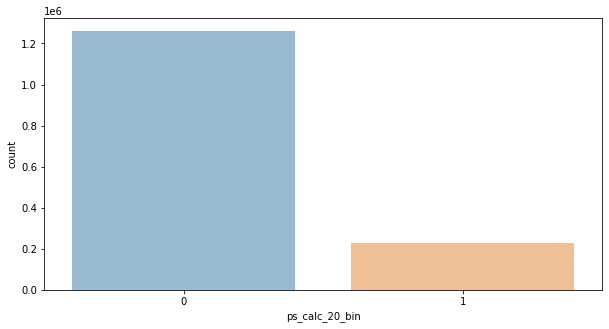

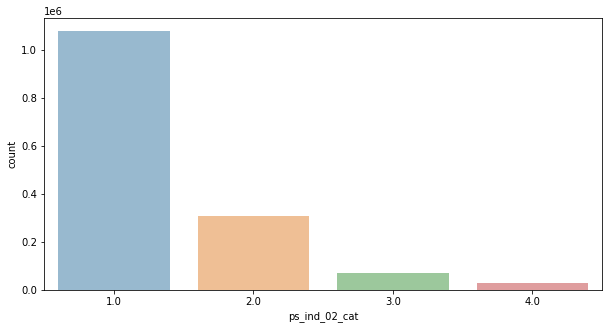

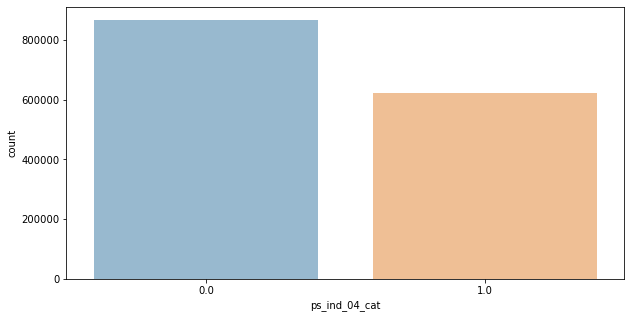

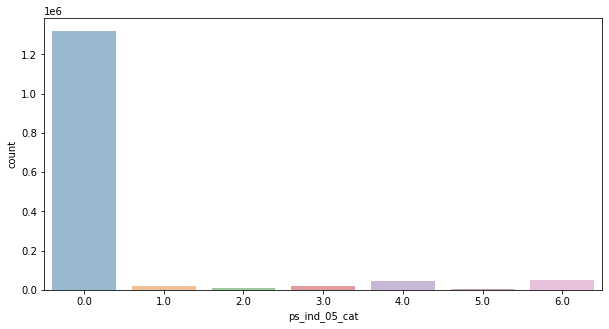

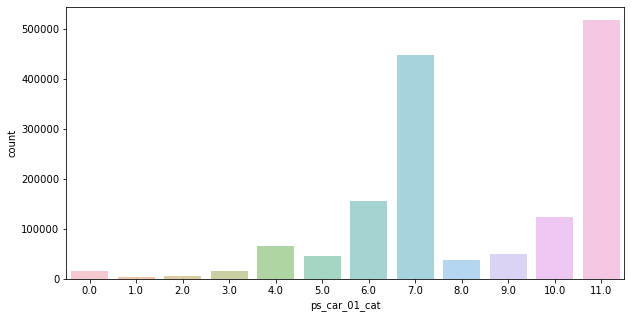

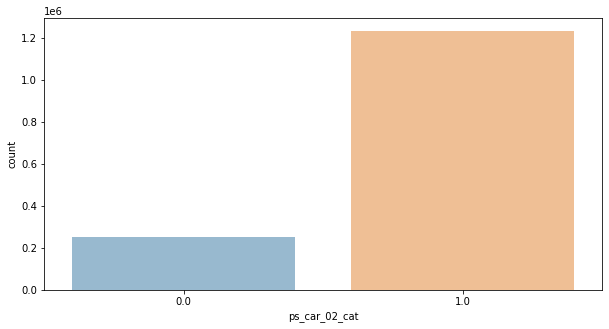

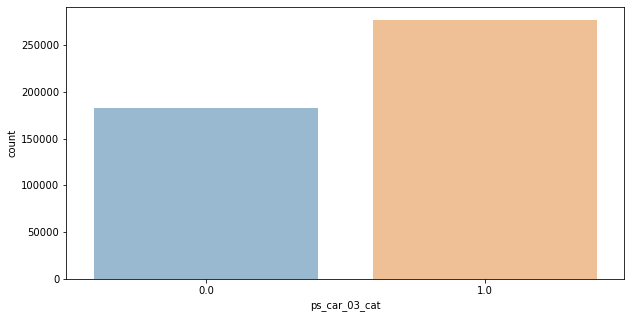

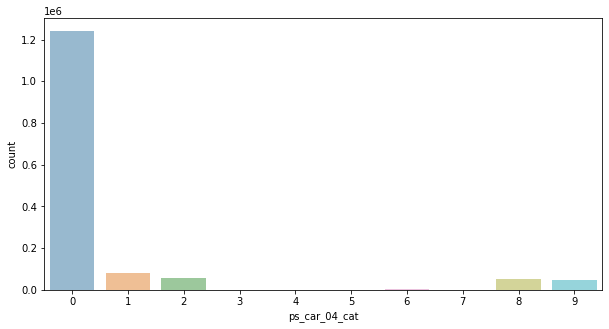

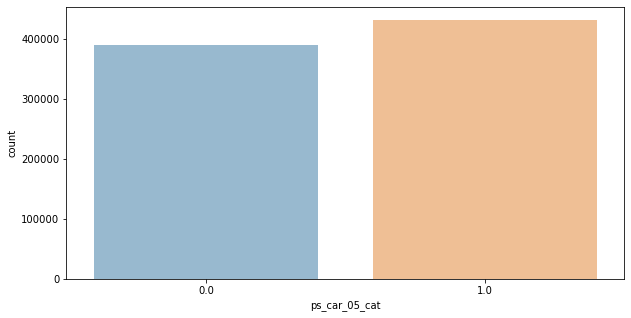

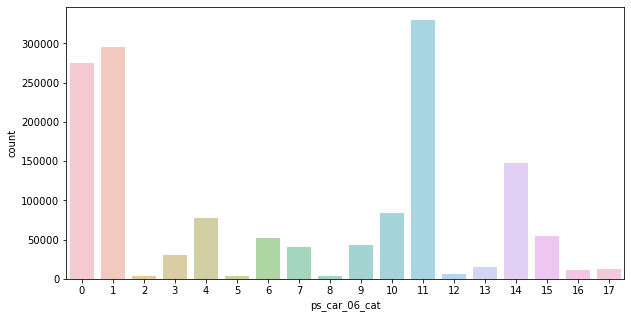

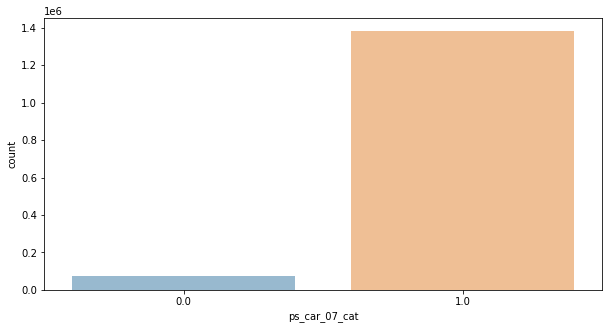

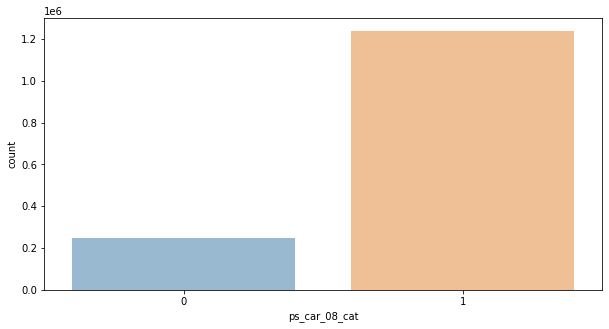

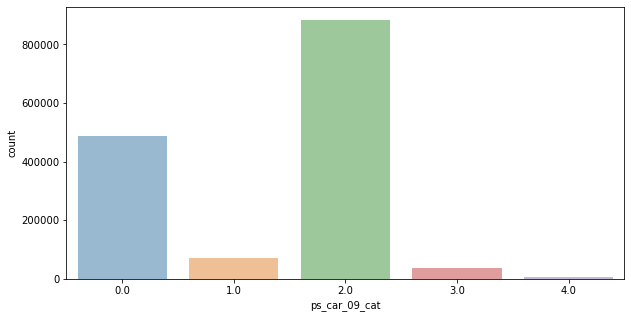

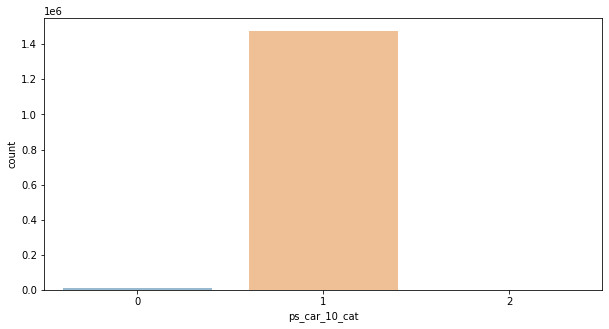

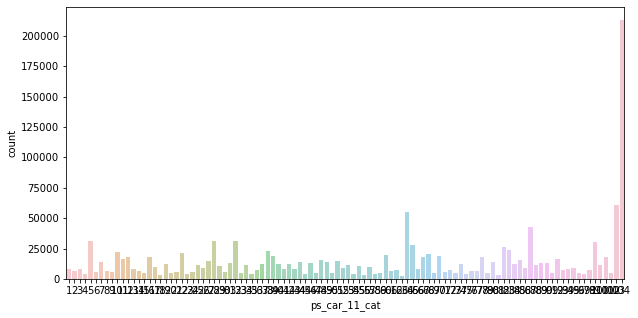

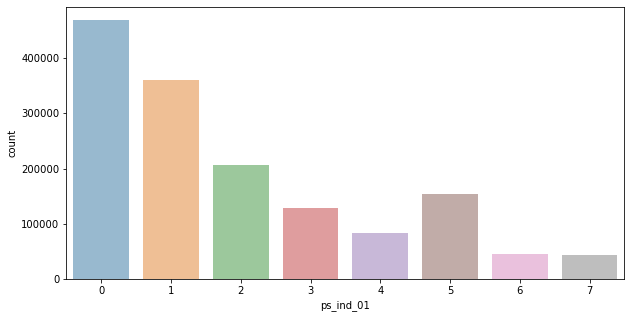

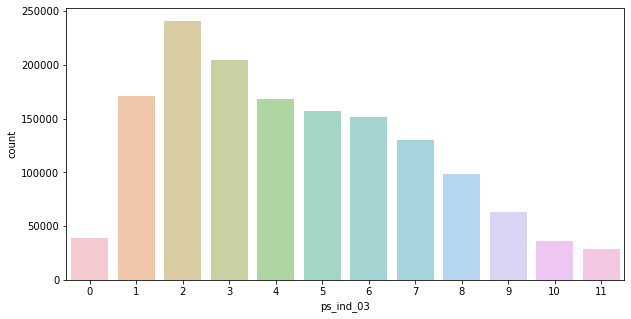

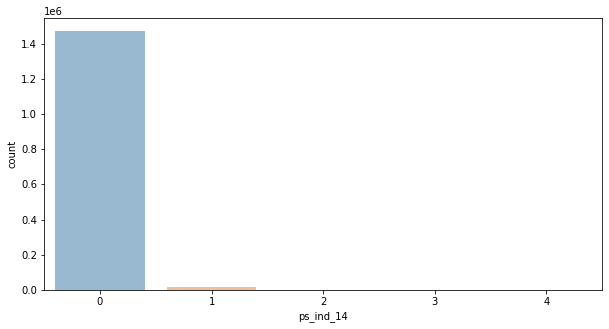

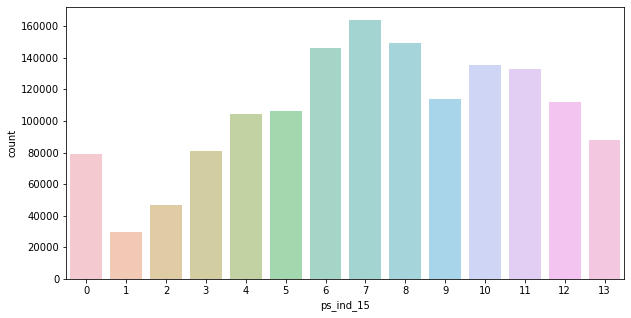

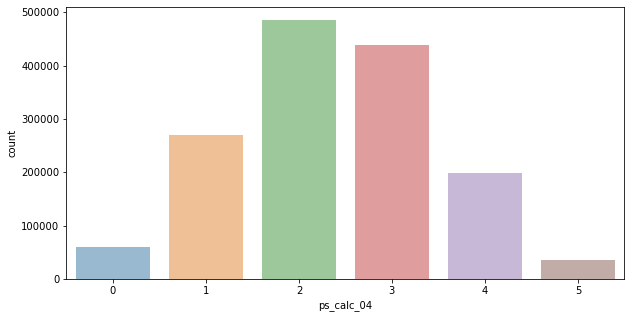

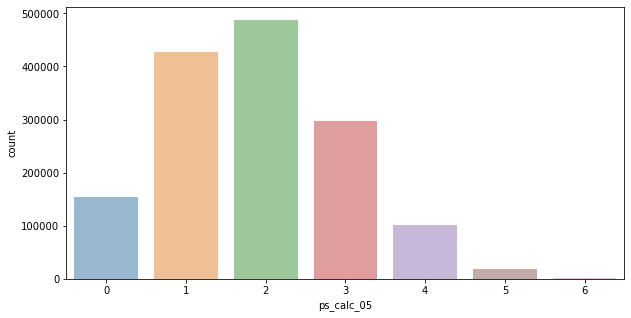

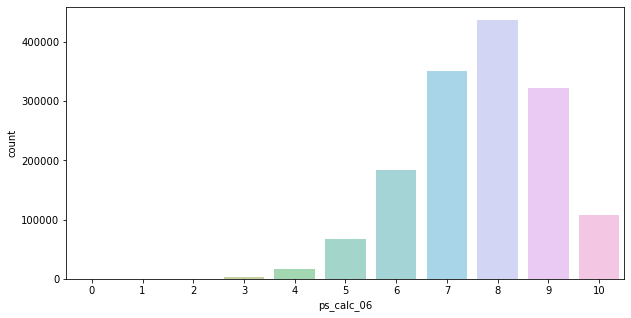

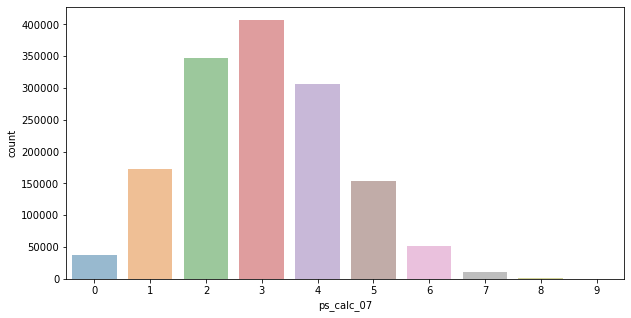

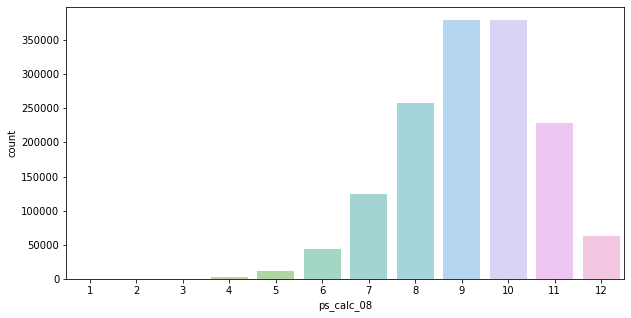

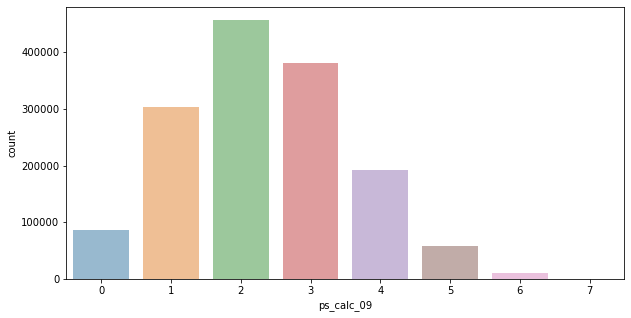

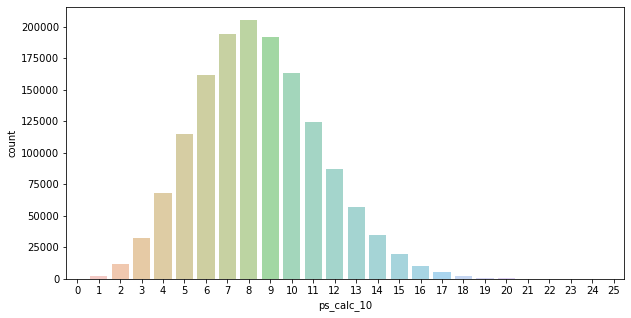

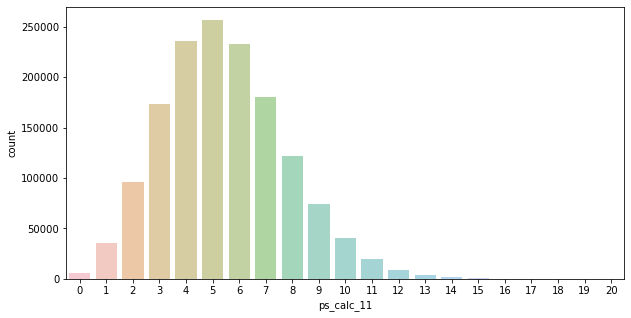

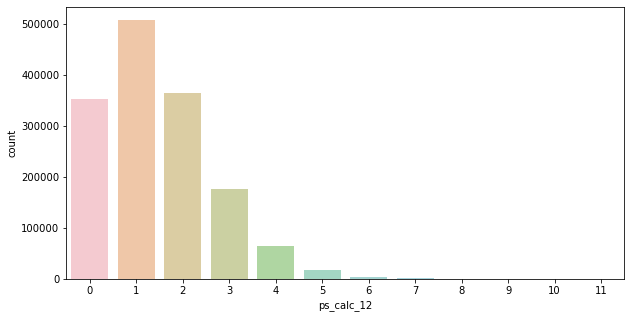

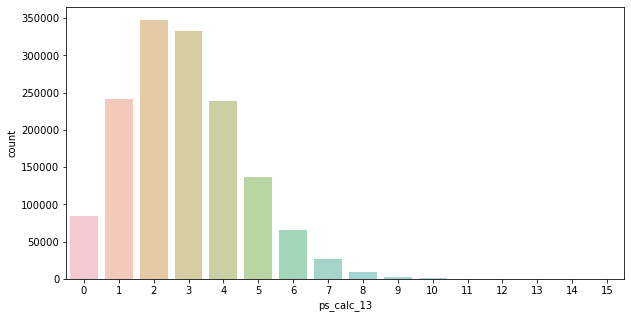

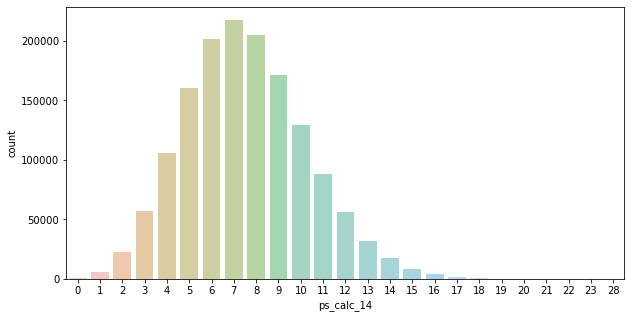

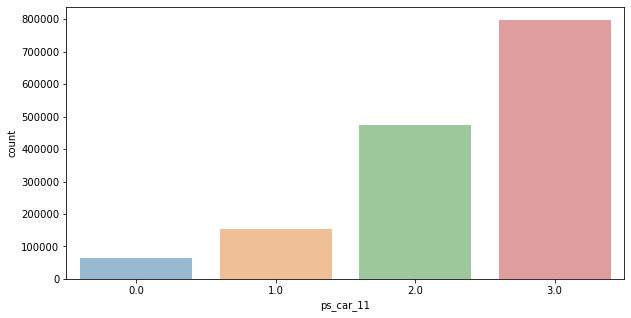

In [18]:
for col in binary + category + integer:
    bar_plot(col, df)

이진 변수 분포에서 0이 앞도적으로 많은 데이터가 종종 발견됨

### 변수간 상관관계 파악하기  
다수의 익명화된 데이터가 제공될 경우 모든 데이터가 학습에 유의미하지 않을 수 있으며, 상관관계가 너무 높은 두 변수를 하나에 넣으면 다중공진성 문제가 발생 하기 때문에 피해야한다

<AxesSubplot:>

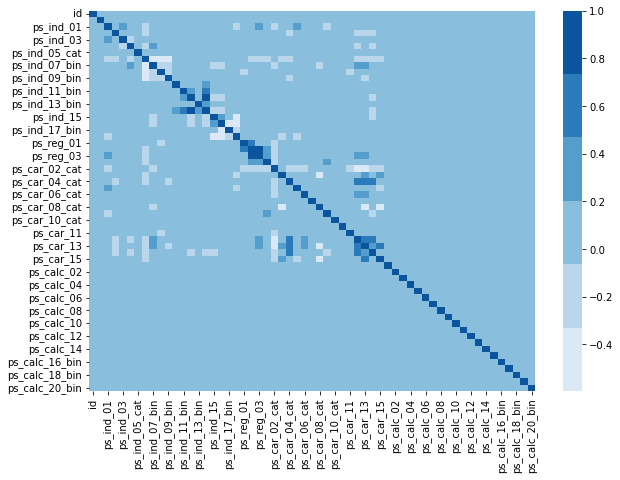

In [20]:
# 전체 데이터에 대한 상관관계 HeatMap 시각화
corr = df.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

대부분의 변수들이 상관관계가 매우 낮음을 확인할 수 있음 다만 ps_ind_14와 ps_ind_12_bin두 변수가 0.89의 높은 상관관계를 보우하고 있으며 일부 0.5~0.6정도 수준의 상관관계를 가진다.

일반적으로 0.95 이상의 상관관계를 가질 경우 변수를 제거하나 이번에는 0.89수준이기에 따로 제거는 하지 않음

<AxesSubplot:>

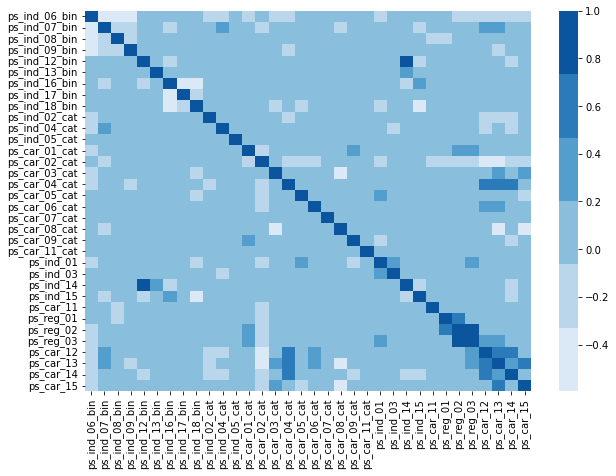

In [22]:
# 일부 변수만 선별
features = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 
          'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin',
          'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 
          'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 
          'ps_car_11_cat', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11',
          'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
          'ps_car_14', 'ps_car_15']

corr_sub = df[features].corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr_sub, cmap=cmap)

### 단일 변수 vs 타겟 변수
단일 변수의 고유값 별로 타겟 변수의 비율을 시각화, 단일 변수와 타겟 변수 비율에 대한 시각화는 변수들의 예측 능력을 살펴볼 수 있음 검정색 직선은 95%의 신뢰 구간을 의미 

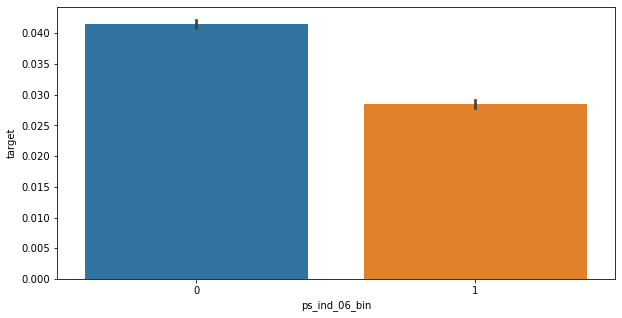

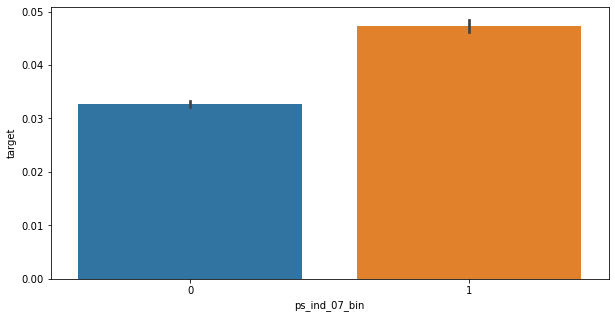

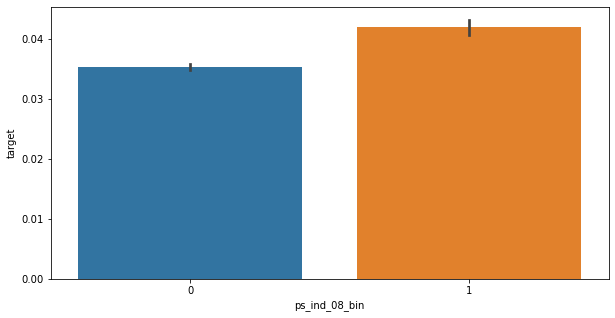

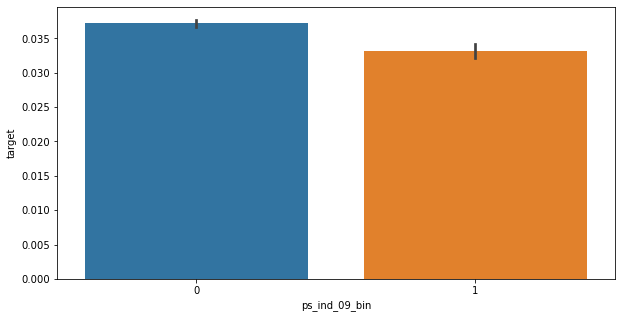

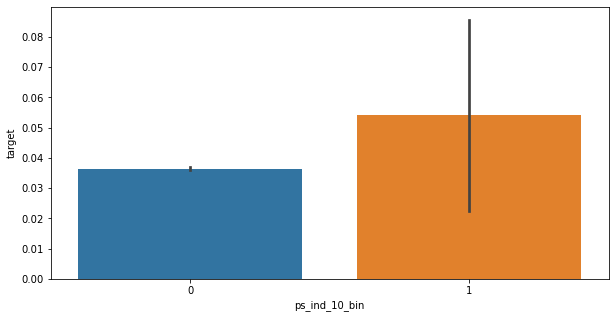

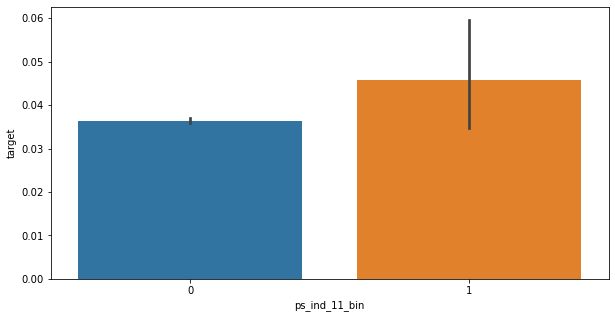

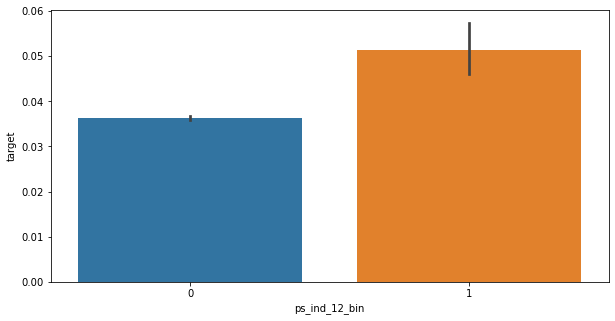

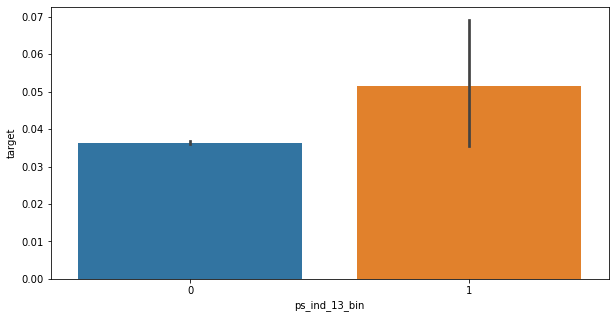

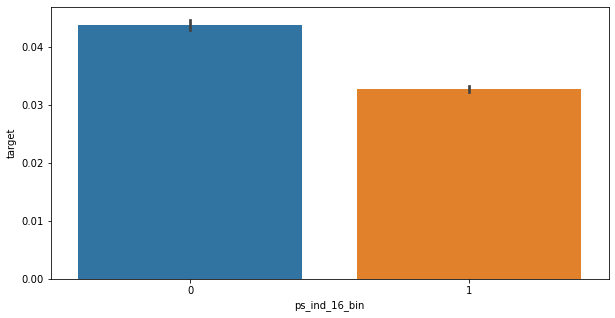

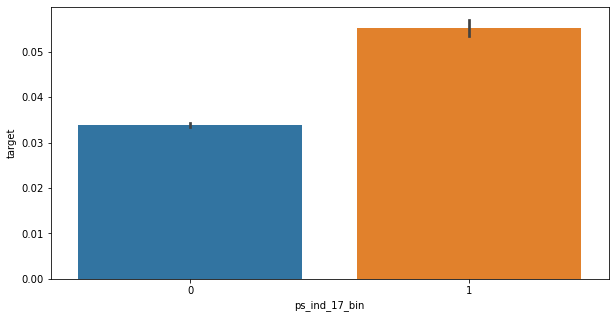

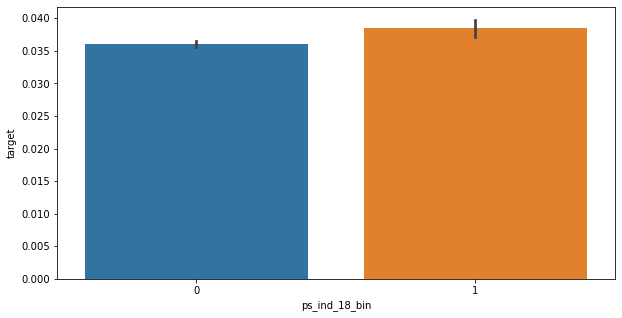

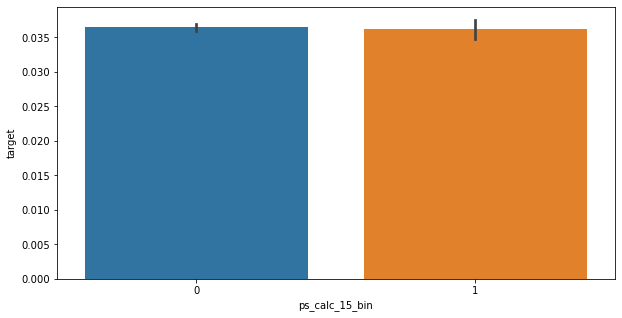

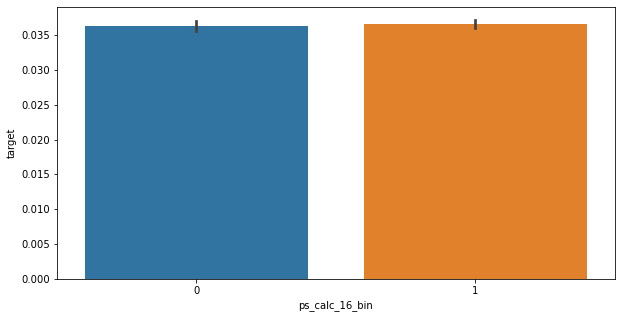

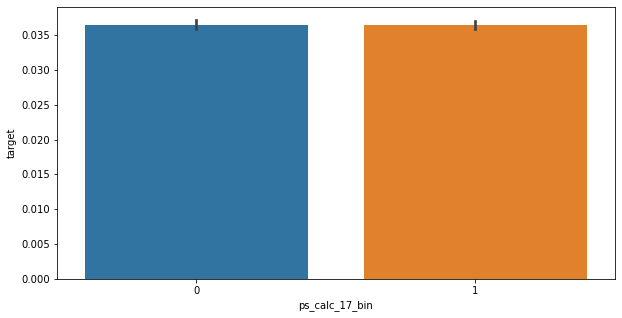

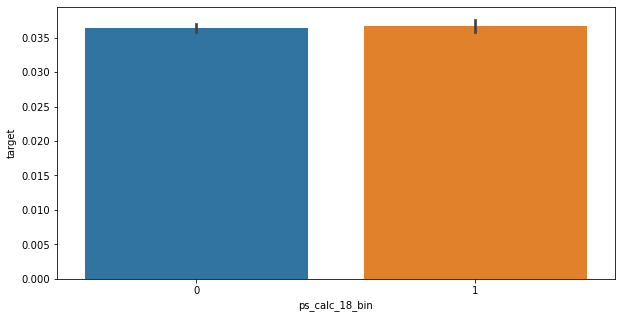

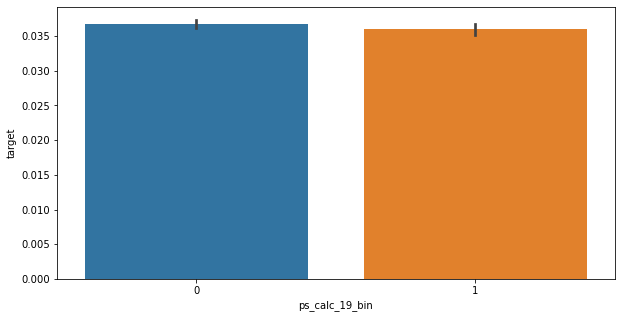

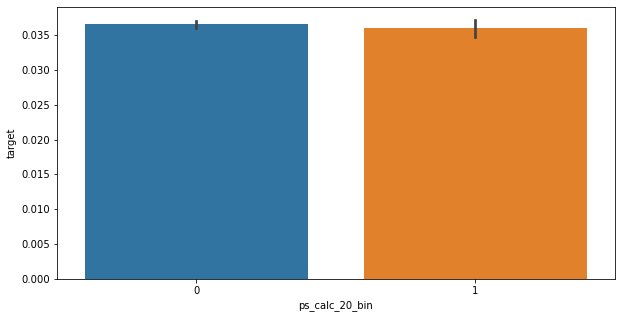

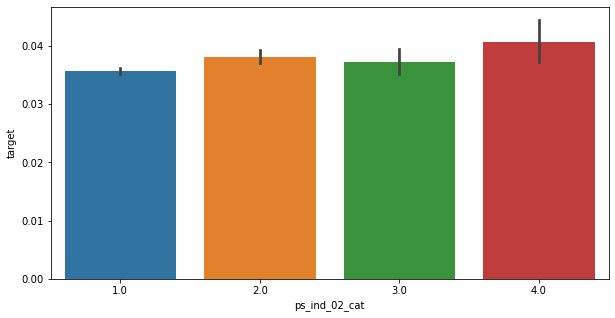

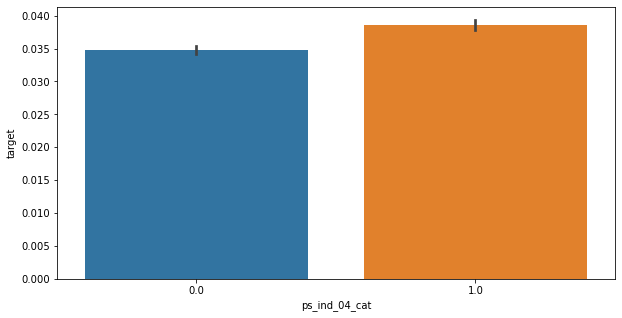

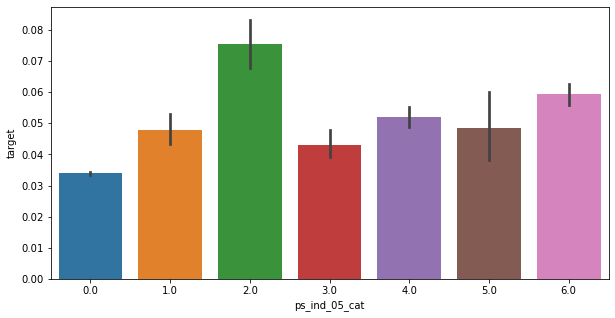

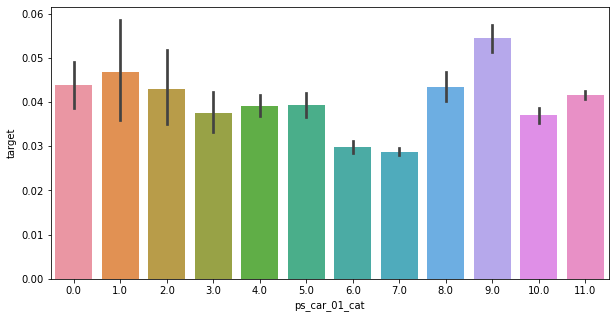

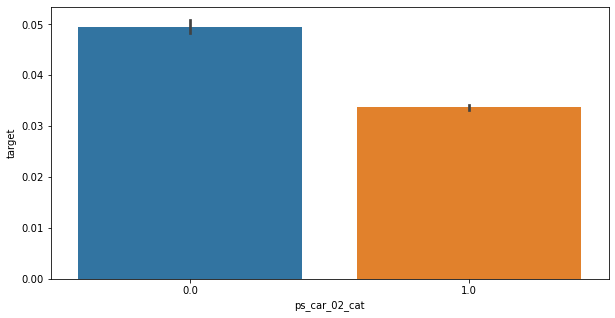

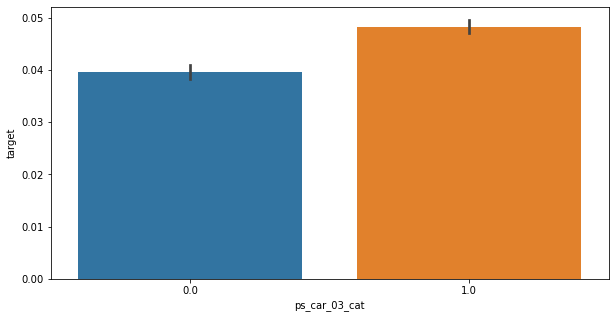

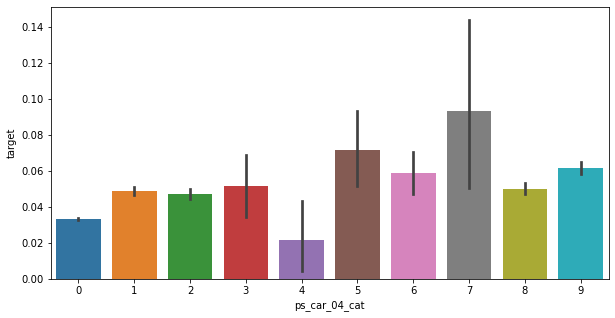

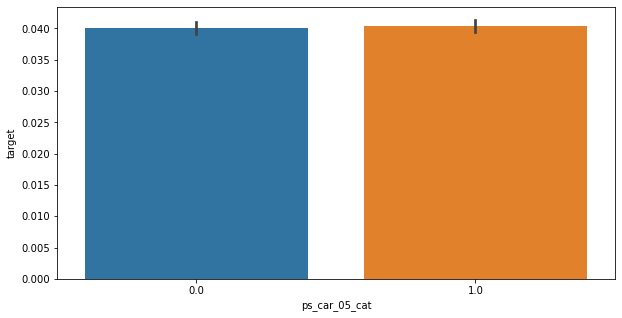

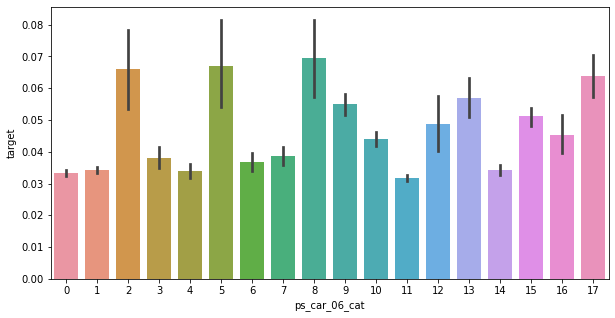

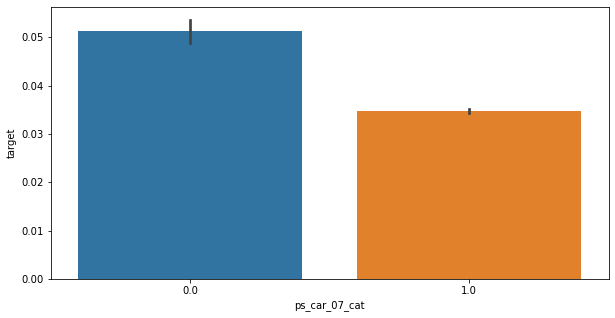

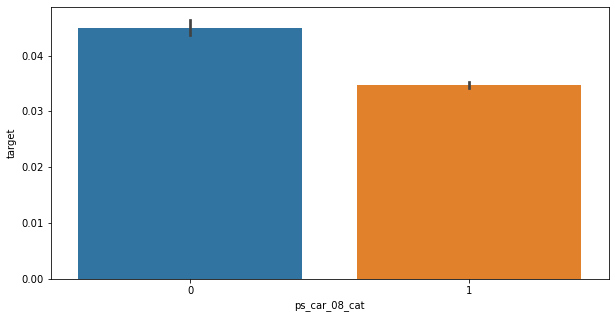

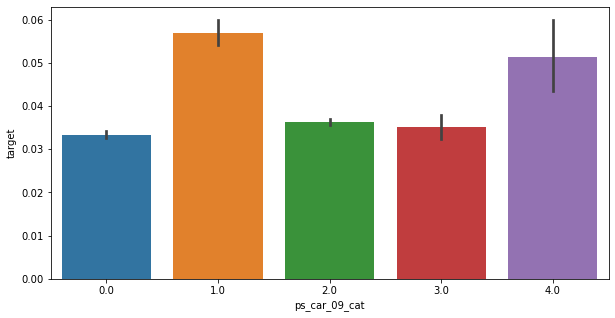

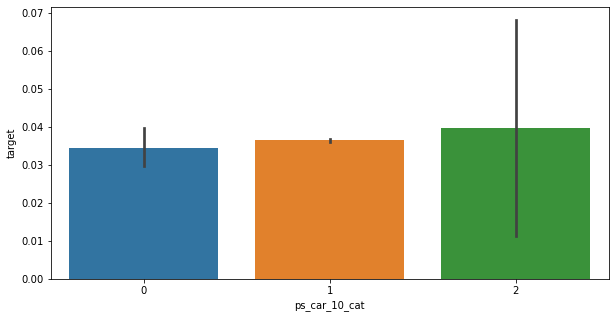

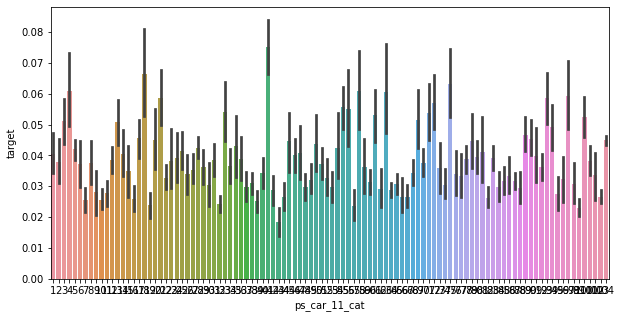

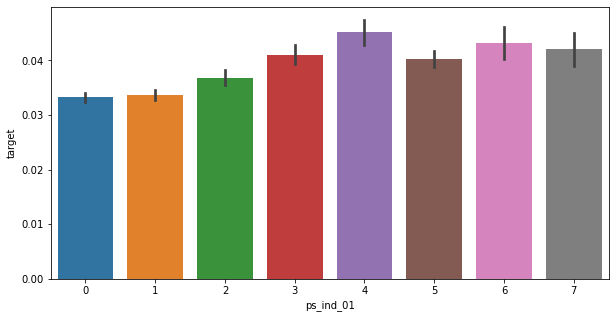

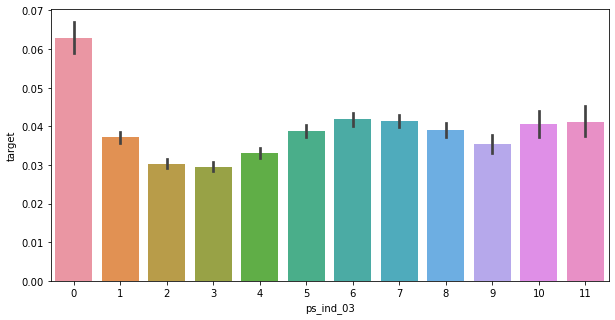

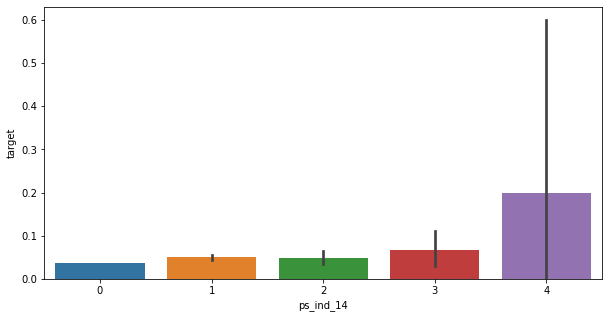

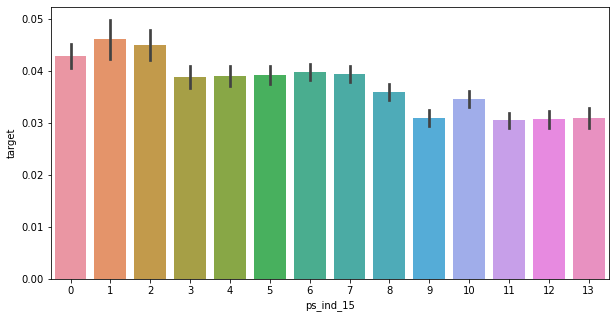

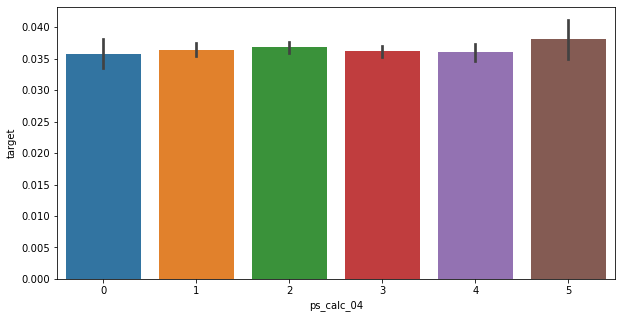

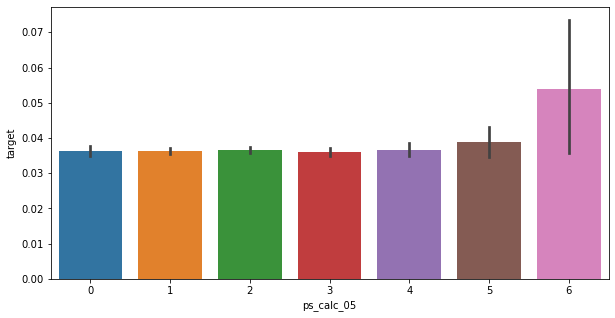

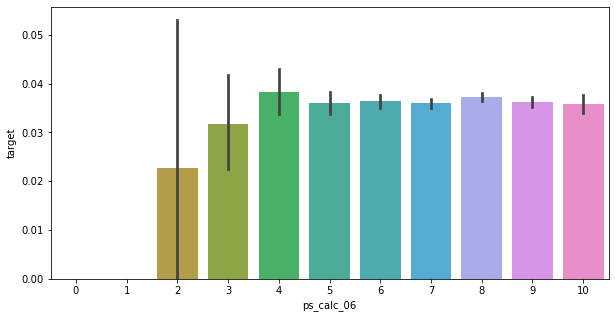

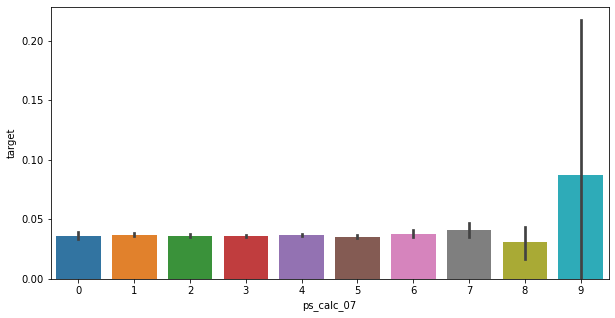

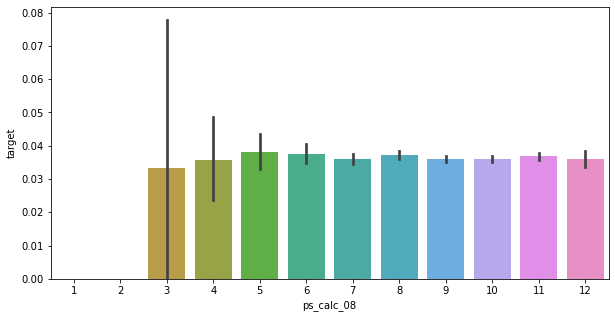

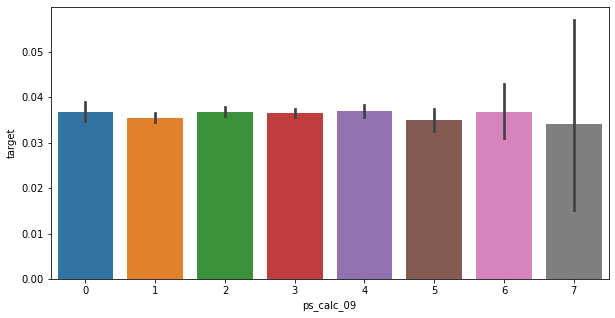

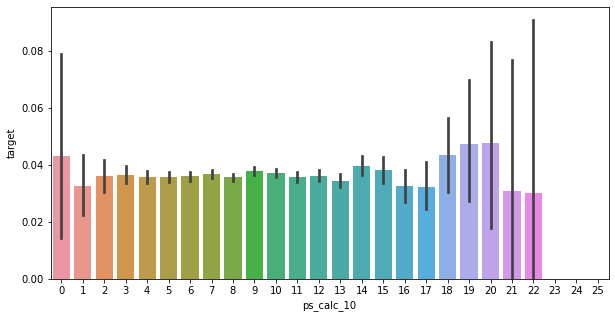

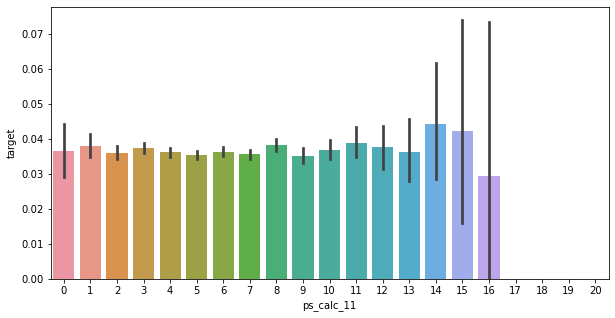

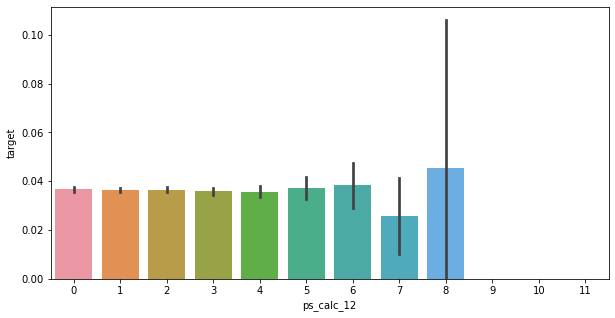

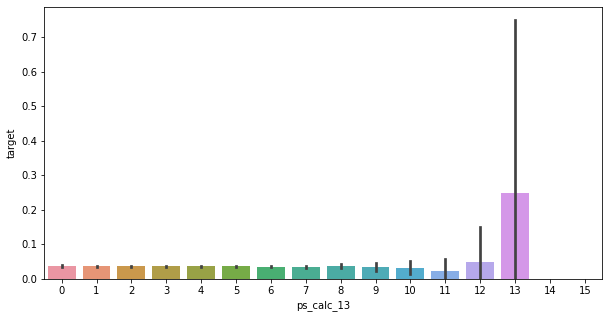

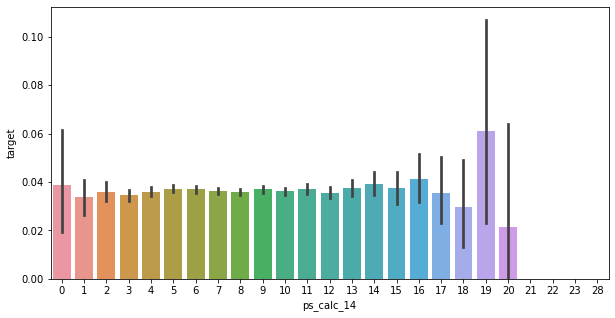

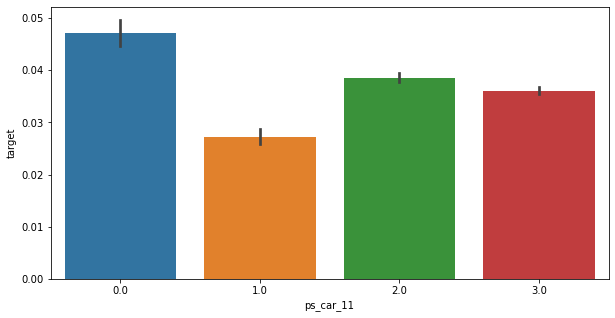

In [24]:
for col in (binary + category + integer):
    bar_plot_ci(col, df)

ps_car_05_cat과 ps_ind_02_cat는 통계적으로 유효한 차이를 찾기 어렵다.
ps_cal_06, ps_calc_07두 변수는 특정 값에서 타겟 비율의 95% 신뢰구간이 너무 광범위해서 변수로써 예측 능력이 많이 떨어짐
ps_ind_01, ps_ind_03 두 변수는 고유값별로 95%신뢰 구간이 군집화 되는 것으로 보아 어느정도 예측 능력을 보유하는 것으로 보임

### 훈련 데이터와 테스트 데이터 비교
두 데이터의 분포가 심각하게 다를 경우 의미있는 결과를 얻기가 힘듬

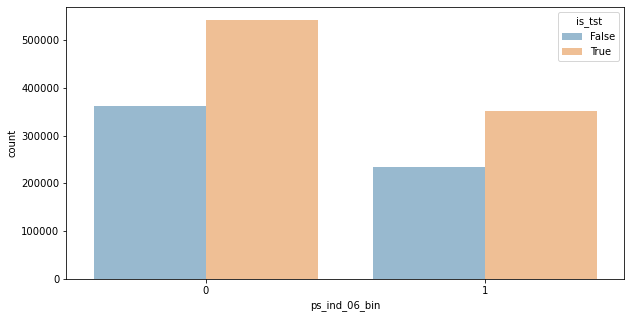

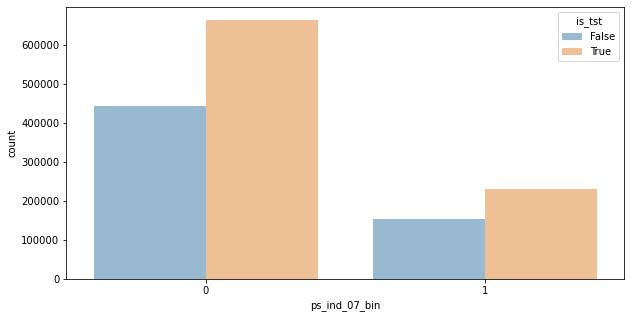

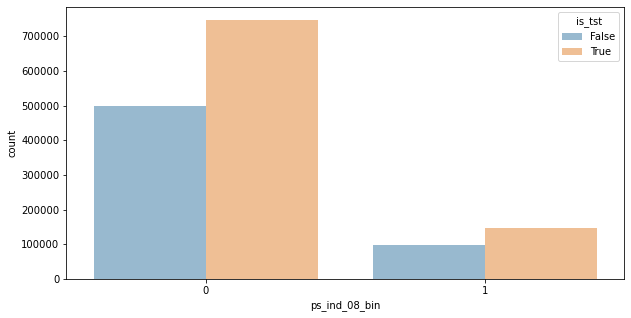

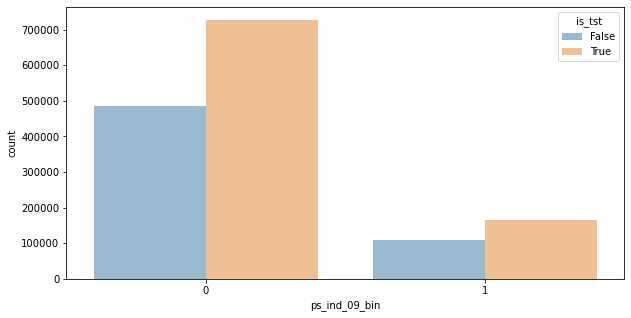

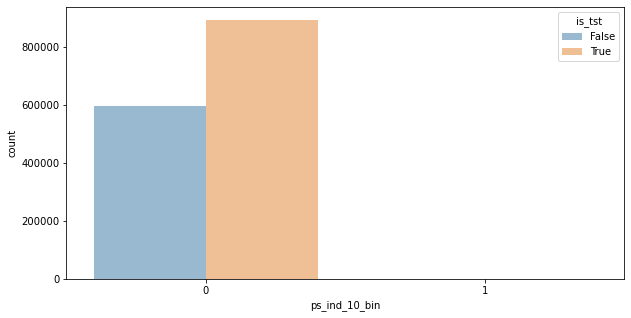

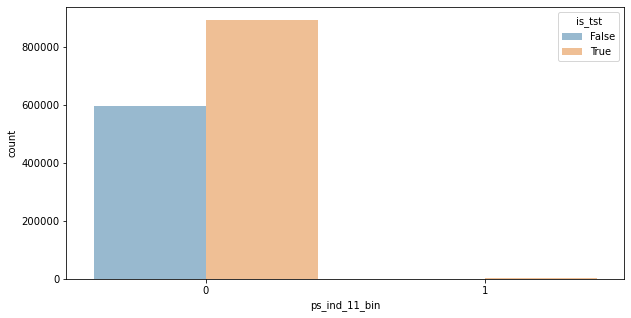

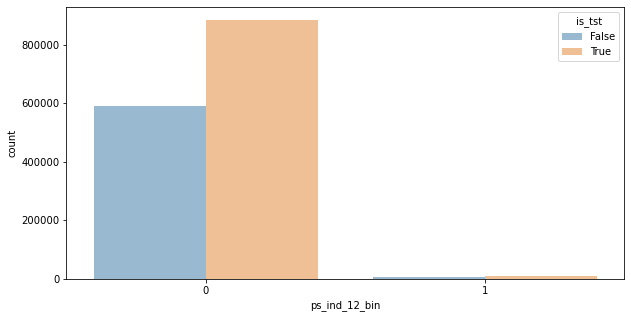

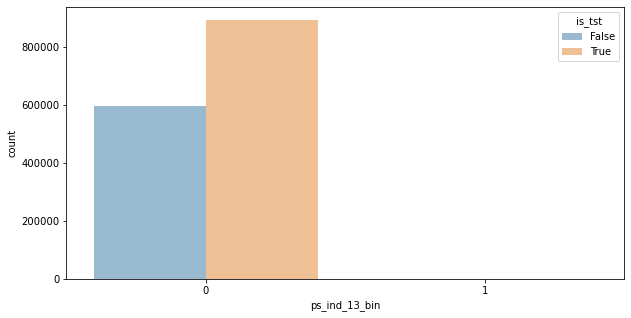

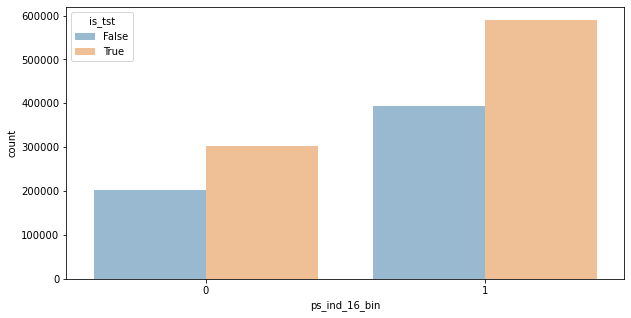

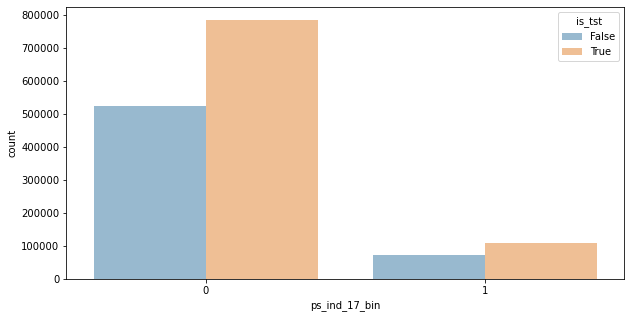

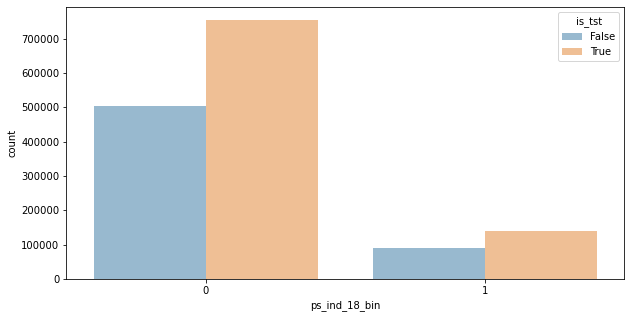

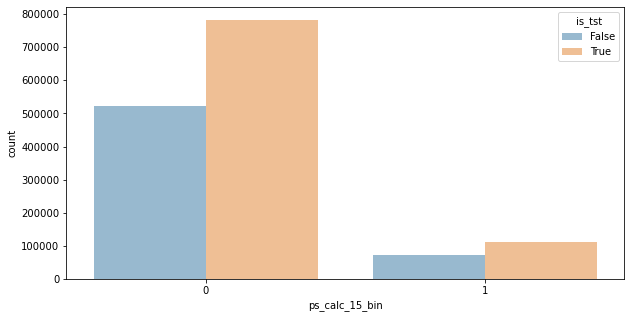

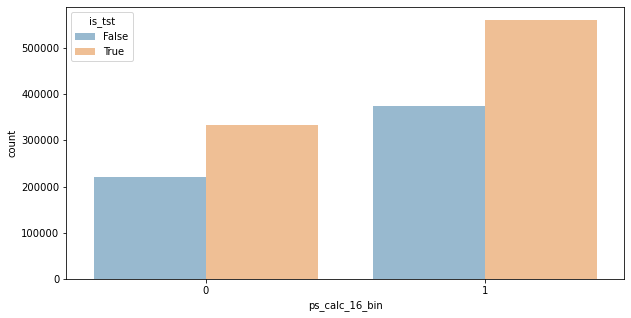

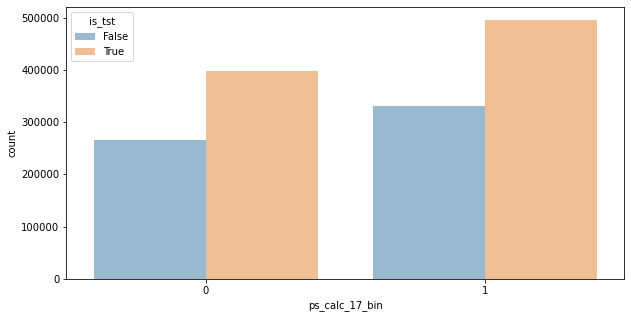

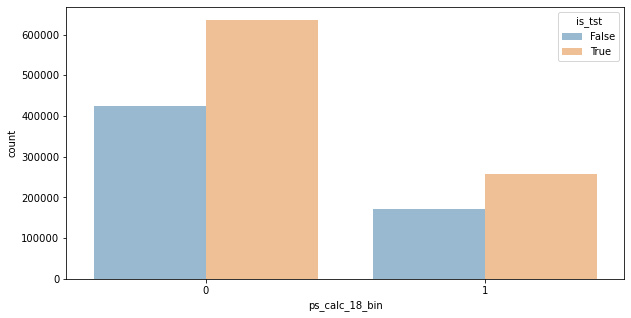

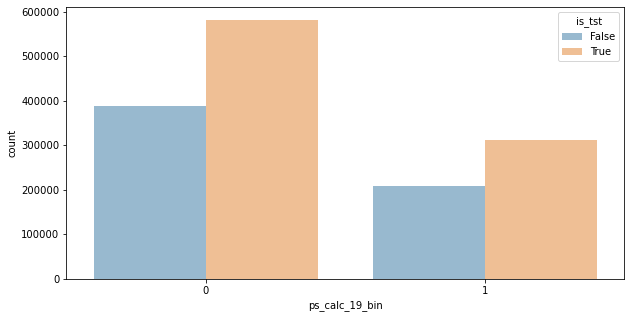

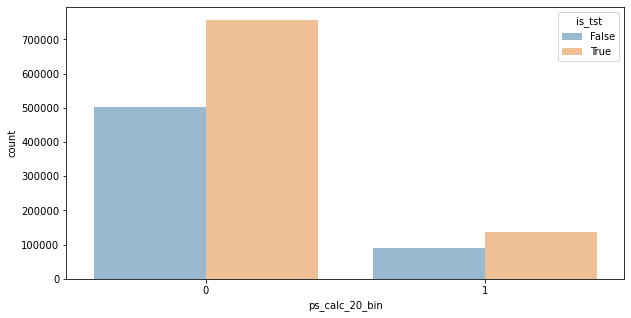

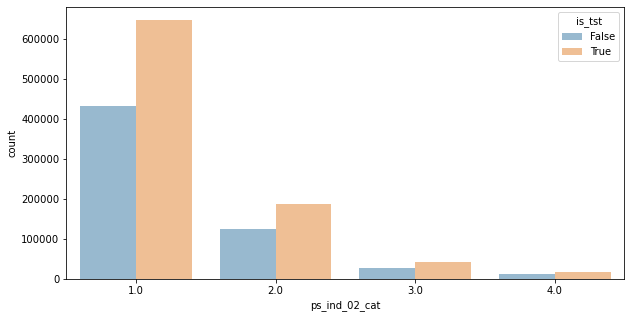

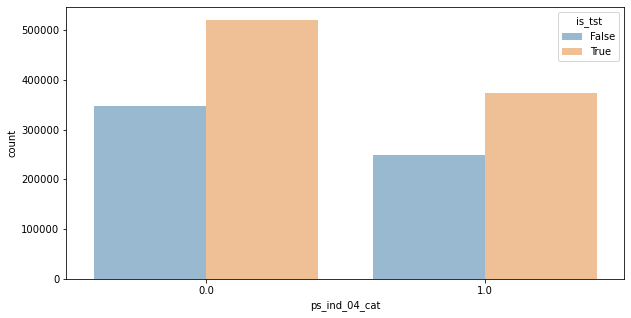

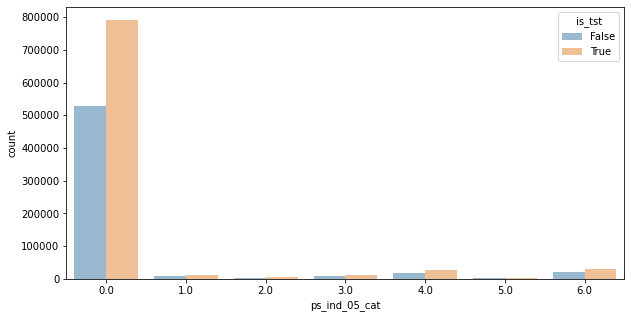

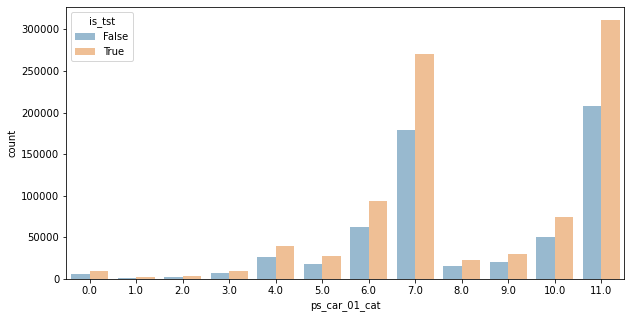

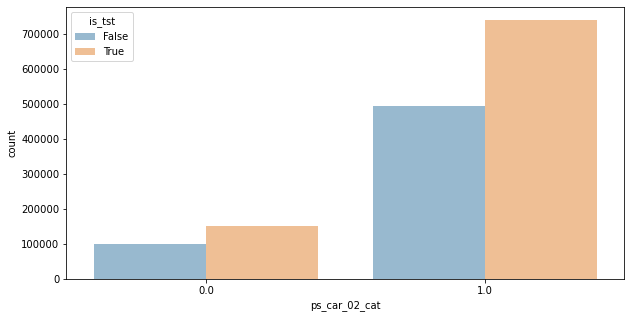

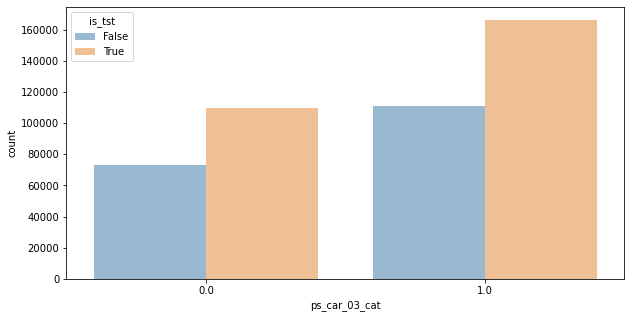

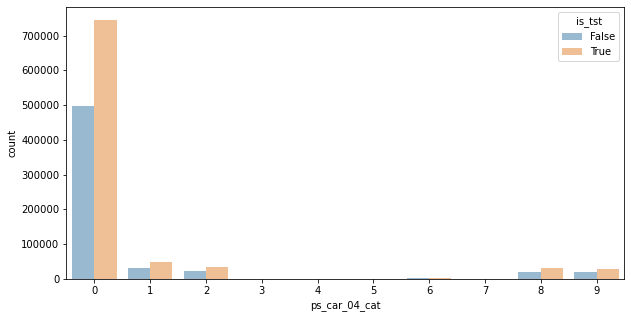

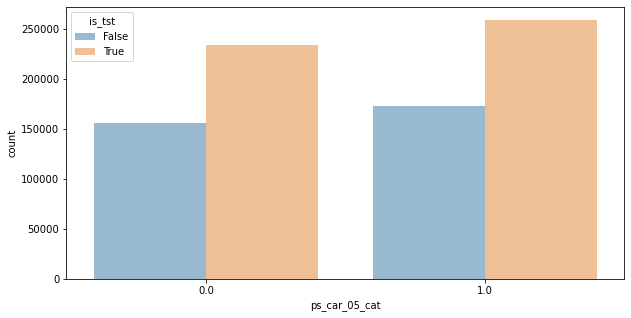

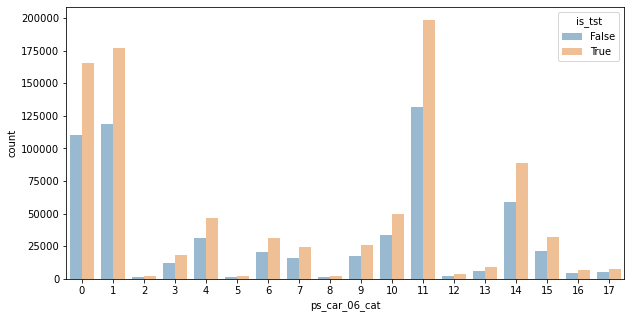

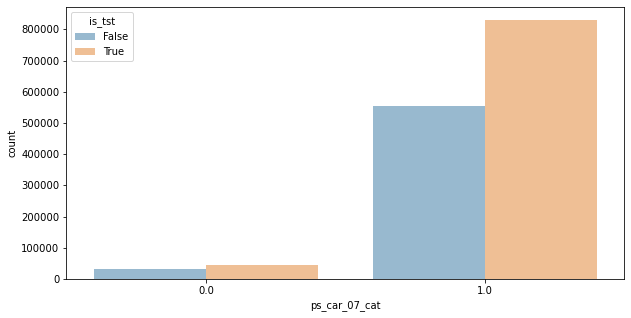

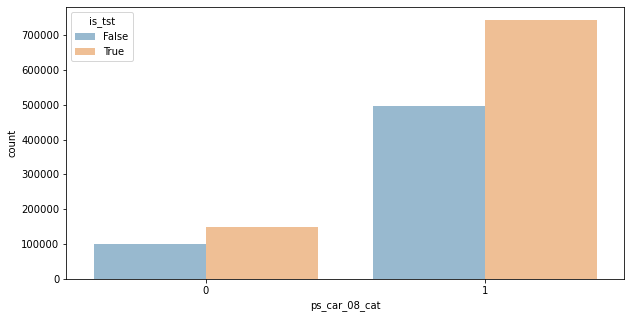

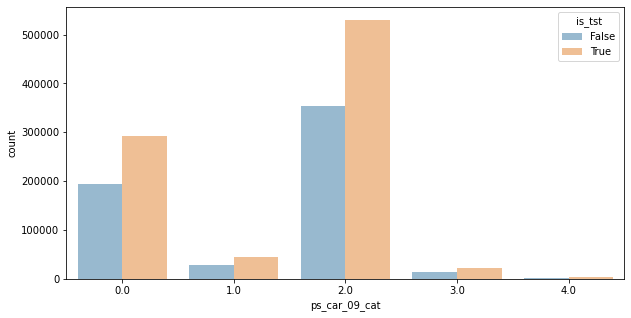

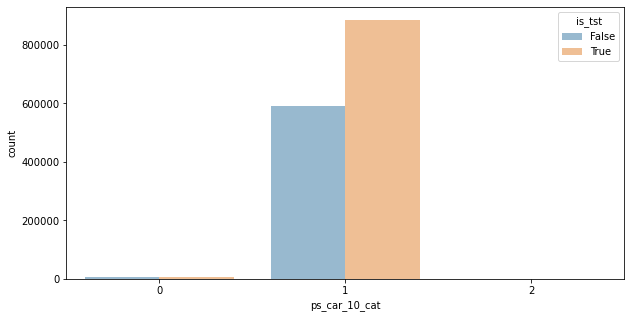

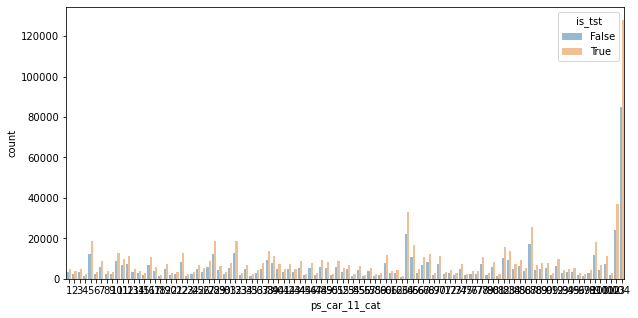

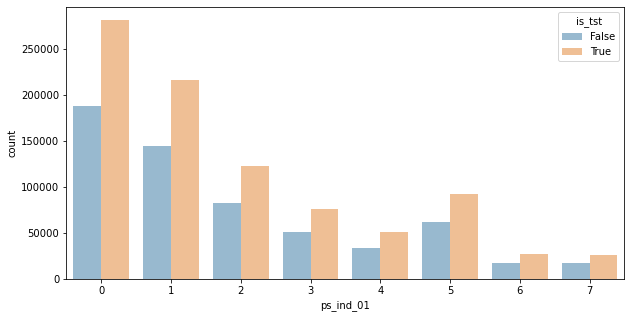

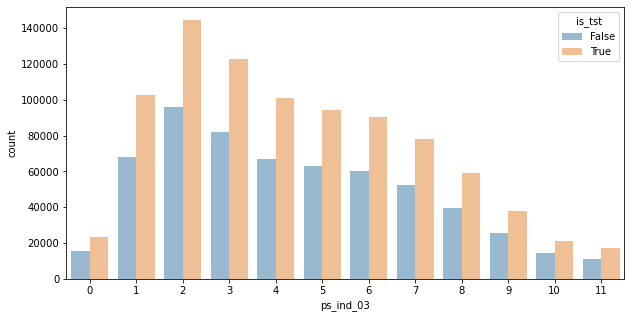

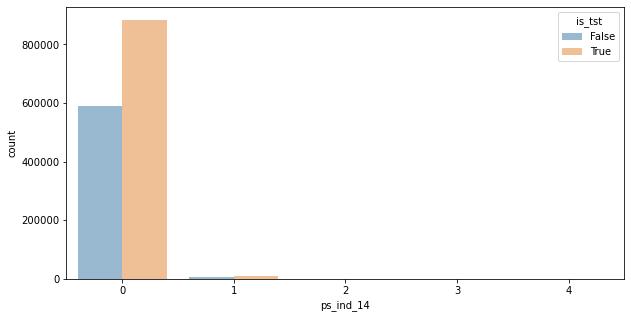

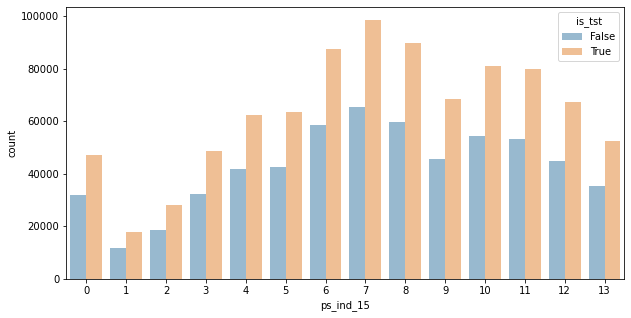

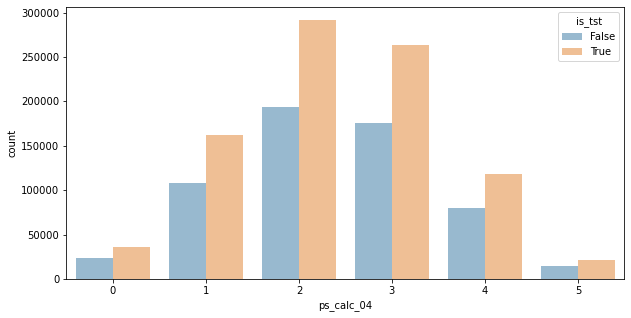

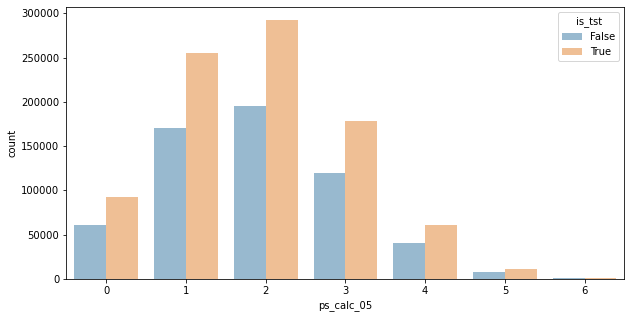

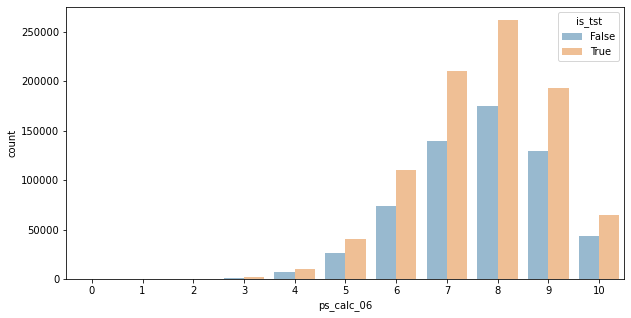

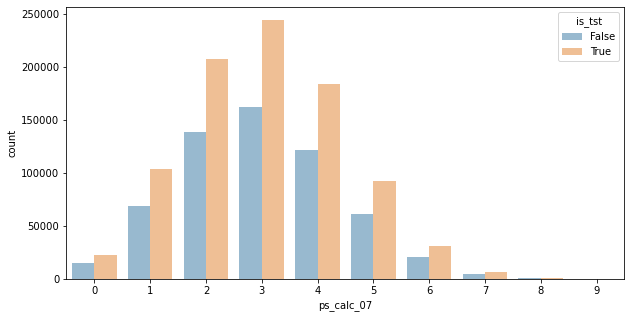

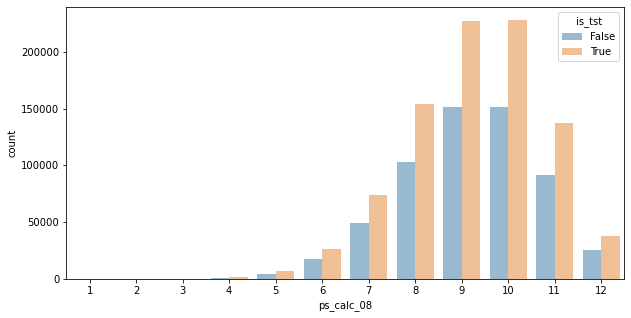

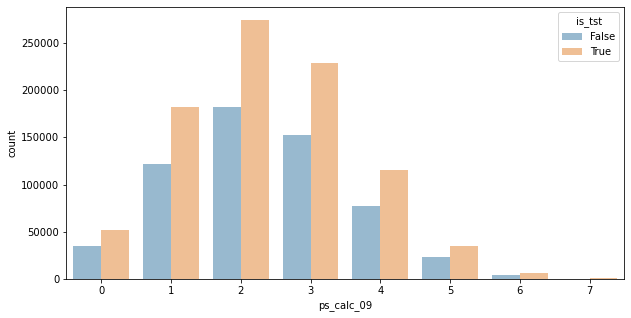

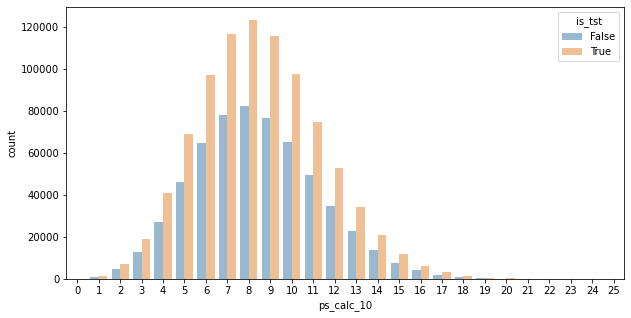

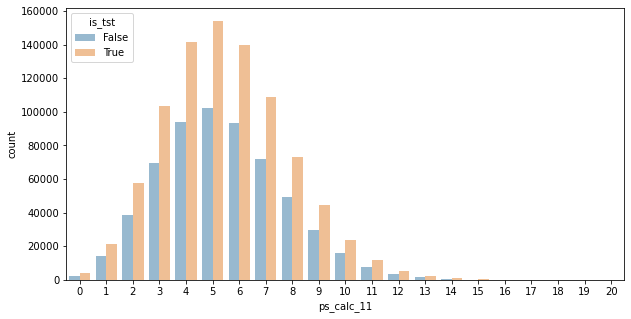

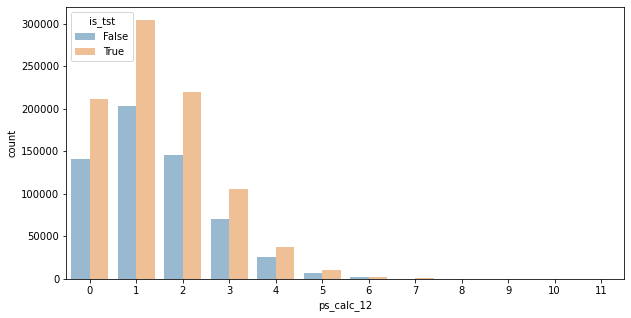

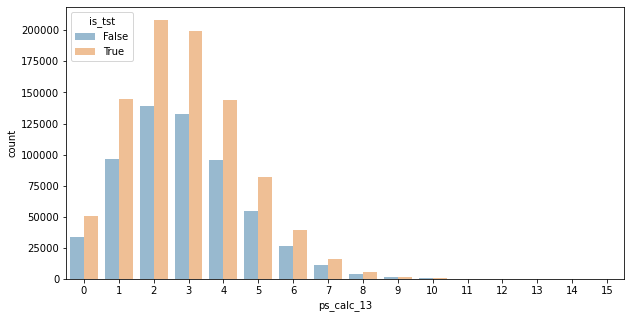

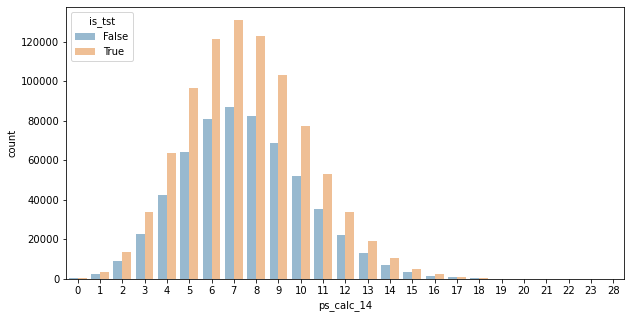

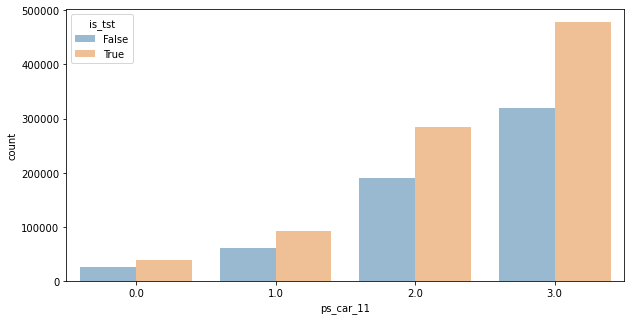

In [25]:
df['is_tst'] = df['target'].isnull()
for col in binary + category + integer:
    bar_plot(col, df, 'is_tst')

대충 모든 이진 변수에 대해서 테스트 데이터의 빈도가 훈련 데이터보다 1.5배정도 됨

데이터는 총 4개(ind, calc, car, reg)의 그룹으로 변수를 군집하였고 이를 통해서 이진/ 범주형/ 정수 소수로 구분 한 것을 알 수 있었음

## BaseLine

In [30]:
import pandas as pd

# 훈련/테스트 데이터를 읽어온다
train = pd.read_csv("train.csv")
train_label = train['target']
train_id = train['id']
del train['target'], train['id']

test = pd.read_csv("test.csv")
test_id = test['id']
del test['id']

기본적인 피처엔지니어링 진행  
1. 결측값의 개수를 나타내는 missing변수
2. 이진 변수들의 총합
3. Tqarget Encoding 파생변수

In [32]:
# 파생 변수 01 : 결측값을 의미하는 “-1”의 개수를 센다
train['missing'] = (train==-1).sum(axis=1).astype(float)
test['missing'] = (test==-1).sum(axis=1).astype(float)

# 파생 변수 02 : 이진 변수의 합
bin_features = [c for c in train.columns if 'bin' in c]
train['bin_sum'] = train[bin_features].sum(axis=1)
test['bin_sum'] = test[bin_features].sum(axis=1)

# 파생 변수 03 : 단일변수 타겟 비율 분석으로 선정한 변수를 기반으로 Target Encoding을 수행한다. Target Encoding은 교차 검증 과정에서 진행한다.
features = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_12_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_11_cat', 'ps_ind_01', 'ps_ind_03', 'ps_ind_15', 'ps_car_11']

#### 첫 번째 파생 변수는 운전자 데이터별 결측값의 개수를 더한 값
왜 결측값의 개수가 유용할 수 있을까? 장기 고객의 경우 데이터가 많아 결측값의 수가 적고 신규 고객의 경우 데이터가 적어서 결측값이 많다는 것을 유추할 수 있음 -> 도메인 지식이 중요한 이유

#### 두번째 파생 변수는 이진 변수 값의 합
변수간의 상호 작용으로 얻을 수 있는 고차원 정보를 추출

#### 세 번째 파생 변수는 데이터 탐색 분석 과정에서 선별한 일부 변수를 대상으로 Target Enoding을 실시
Target Encodiing는 단별 변수의 고유값별 타겟 변수의 평균 값을 파생 변수로 활용하는 피처엔지니어링 기법
예를 들어 운전자 A의 'ps_ind_01' 변수 값이 0일 경우, 'ps_ind_01 변수 값이 0인 모든 운전자들의 평균 타겟 값을 'ps_ind_01_target_enc' 파생 변수로 사용 하는 것이다. 주로 범주형 변수에서 좋은 성능을 보임


## LightGBM모델 정의

In [33]:
# LightGBM 모델의 설정값이다.
num_boost_round = 10000
params = {"objective": "binary",
          "boosting_type": "gbdt",
          "learning_rate": 0.1,
          "num_leaves": 15,
          "max_bin": 256,
          "feature_fraction": 0.6,
          "verbosity": 0,
          "drop_rate": 0.1,
          "is_unbalance": False,
          "max_drop": 50,
          "min_child_samples": 10,
          "min_child_weight": 150,
          "min_split_gain": 0,
          "subsample": 0.9,
          "seed": 2018
}

## 모델 학습 및 교차 검증 평가
5-Flod StratifiedKFold 기법 시계열 데이터가 아니기 때문에(아마도) 데이터를 랜덤하게 분리하여 교차 검증에 활용

In [39]:
def Gini(y_true, y_pred):
    # 정답과 예측값의 개수가 동일한지 확인한다
    assert y_true.shape == y_pred.shape
    n_samples = y_true.shape[0]

    # 예측값(y_pred)를 오름차순으로 정렬한다
    arr = np.array([y_true, y_pred]).transpose()
    true_order = arr[arr[:, 0].argsort()][::-1, 0]
    pred_order = arr[arr[:, 1].argsort()][::-1, 0]

    # Lorenz curves를 계산한다
    L_true = np.cumsum(true_order) * 1. / np.sum(true_order)
    L_pred = np.cumsum(pred_order) * 1. / np.sum(pred_order)
    L_ones = np.linspace(1 / n_samples, 1, n_samples)

    # Gini 계수를 계산한다
    G_true = np.sum(L_ones - L_true)
    G_pred = np.sum(L_ones - L_pred)

    # Gini 계수를 정규화한다
    return G_pred * 1. / G_true

# LightGBM 모델 학습 과정에서 평가 함수로 사용한다
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', Gini(labels, preds), True


In [40]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgbm

# Stratified 5-Fold 내부 교차 검증을 준비한다
NFOLDS = 5
kfold = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=218)
kf = kfold.split(train, train_label)

cv_train = np.zeros(len(train_label))
cv_pred = np.zeros(len(test_id))    
best_trees = []
fold_scores = []

for i, (train_fold, validate) in enumerate(kf):
    # 훈련/검증 데이터를 분리한다
    X_train, X_validate, label_train, label_validate = train.iloc[train_fold, :], train.iloc[validate, :], train_label[train_fold], train_label[validate]
    
    # target encoding 피쳐 엔지니어링을 수행한다
    for feature in features:
        # 훈련 데이터에서 feature 고유값별 타겟 변수의 평균을 구한다
        map_dic = pd.DataFrame([X_train[feature], label_train]).T.groupby(feature).agg('mean')
        map_dic = map_dic.to_dict()['target']
        # 훈련/검증/테스트 데이터에 평균값을 매핑한다
        X_train[feature + "_target_enc"] = X_train[feature].apply(lambda x: map_dic.get(x, 0))
        X_validate[feature + "_target_enc"] = X_validate[feature].apply(lambda x: map_dic.get(x, 0))
        test[feature + "_target_enc"] = test[feature].apply(lambda x: map_dic.get(x, 0))

    dtrain = lgbm.Dataset(X_train, label_train)
    dvalid = lgbm.Dataset(X_validate, label_validate, reference=dtrain)
    # 훈련 데이터를 학습하고, evalerror() 함수를 통해 검증 데이터에 대한 정규화 Gini 계수 점수를 기준으로 최적의 트리 개수를 찾는다.
    bst = lgbm.train(params, dtrain, num_boost_round, valid_sets=dvalid, feval=evalerror, verbose_eval=100, early_stopping_rounds=100)
    best_trees.append(bst.best_iteration)
    # 테스트 데이터에 대한 예측값을 cv_pred에 더한다.
    cv_pred += bst.predict(test, num_iteration=bst.best_iteration)
    cv_train[validate] += bst.predict(X_validate)

    # 검증 데이터에 대한 평가 점수를 출력한다.
    score = Gini(label_validate, cv_train[validate])
    print(score)
    fold_scores.append(score)

cv_pred /= NFOLDS

# 시드값별로 교차 검증 점수를 출력한다.
print("cv score:")
print(Gini(train_label, cv_train))
print(fold_scores)
print(best_trees, np.mean(best_trees))

# 테스트 데이터에 대한 결과물을 저장한다.
pd.DataFrame({'id': test_id, 'target': cv_pred}).to_csv('../model/lgbm_baseline.csv', index=False)

C:\Users\dhjun\AppData\Local\Temp/ipykernel_17552/3752236563.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[feature + "_target_enc"] = X_train[feature].apply(lambda x: map_dic.get(x, 0))
C:\Users\dhjun\AppData\Local\Temp/ipykernel_17552/3752236563.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_validate[feature + "_target_enc"] = X_validate[feature].apply(lambda x: map_dic.get(x, 0))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.151603	valid_0's gini: 0.290985
[200]	valid_0's binary_logloss: 0.151546	valid_0's gini: 0.29273
[300]	valid_0's binary_logloss: 0.151658	valid_0's gini: 0.289582
Early stopping, best iteration is:
[204]	valid_0's binary_logloss: 0.151538	valid_0's gini: 0.29314
0.29314009182258344
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.15238	valid_0's gini: 0.264873
Early stopping, best iteration is:
[

FileNotFoundError: [Errno 2] No such file or directory: '../model/lgbm_baseline.csv'

In [41]:
# 모델 학습에 필요한 라이브러리
import lightgbm as lgbm
from scipy import sparse as ssp
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def Gini(y_true, y_pred):
    # 정답과 예측값의 개수가 동일한지 확인한다
    assert y_true.shape == y_pred.shape
    n_samples = y_true.shape[0]

    # 예측값(y_pred)를 오름차순으로 정렬한다
    arr = np.array([y_true, y_pred]).transpose()
    true_order = arr[arr[:, 0].argsort()][::-1, 0]
    pred_order = arr[arr[:, 1].argsort()][::-1, 0]

    # Lorenz curves를 계산한다
    L_true = np.cumsum(true_order) * 1. / np.sum(true_order)
    L_pred = np.cumsum(pred_order) * 1. / np.sum(pred_order)
    L_ones = np.linspace(1 / n_samples, 1, n_samples)

    # Gini 계수를 계산한다
    G_true = np.sum(L_ones - L_true)
    G_pred = np.sum(L_ones - L_pred)

    # Gini 계수를 정규화한다
    return G_pred * 1. / G_true

# LightGBM 모델 학습 과정에서 평가 함수로 사용한다
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', Gini(labels, preds), True

#################
### READ DATA ###
#################

# 훈련 데이터, 테스트 데이터를 읽어온다
train = pd.read_csv('train.csv')
train_label = train['target']
train_id = train['id']
test = pd.read_csv('test.csv')
test_id = test['id']

# target 변수를 별도로 분리하고, ‘id, target’ 변수를 제거한다. 훈련 데이터와 테스트 데이터의 변수를 동일하게 가져가기 위함이다.
y = train['target'].values
drop_feature = [
    'id',
    'target'
]
X = train.drop(drop_feature,axis=1)

###########################
### FEATURE ENGINEERING ###
###########################

# 범주형 변수와 수치형 변수를 분리한다
feature_names = X.columns.tolist()
cat_features = [c for c in feature_names if ('cat' in c and 'count' not in c)]
num_features = [c for c in feature_names if ('cat' not in c and 'calc' not in c)]

# 파생 변수 01 : 결측값을 의미하는 “-1”의 개수를 센다
train['missing'] = (train==-1).sum(axis=1).astype(float)
test['missing'] = (test==-1).sum(axis=1).astype(float)
num_features.append('missing')

# 파생 변수 02 : 범주형 변수를 LabelEncoder()를 통하여 수치형으로 변환한 후, OneHotEncoder()를 통하여 고유값별로 0/1의 이진 변수를 데이터로 사용한다.
for c in cat_features:
    le = LabelEncoder()
    le.fit(train[c])
    train[c] = le.transform(train[c])
    test[c] = le.transform(test[c])
    
enc = OneHotEncoder()
enc.fit(train[cat_features])
X_cat = enc.transform(train[cat_features])
X_t_cat = enc.transform(test[cat_features])

# 파생 변수 03 : ‘ind’ 변수의 고유값을 조합한 ‘new_ind’ 변수를 생성한다.
# 예: ps_ind_01 = 1, ps_ind_02 = 0의 값을 가질 경우, new_ind는 ‘1_2_’라는 문자열 변수가 된다. ind 변수들의 조합을 기반으로 파생 변수를 생성하는 것이다.
ind_features = [c for c in feature_names if 'ind' in c]
count=0
for c in ind_features:
    if count==0:
        train['new_ind'] = train[c].astype(str)+'_'
        test['new_ind'] = test[c].astype(str)+'_'
        count+=1
    else:
        train['new_ind'] += train[c].astype(str)+'_'
        test['new_ind'] += test[c].astype(str)+'_'

# 파생 변수 03 continue : 범주형 변수와 ‘new_ind’ 고유값의 빈도를 파생 변수로 생성한다.
cat_count_features = []
for c in cat_features+['new_ind']:
    d = pd.concat([train[c],test[c]]).value_counts().to_dict()
    train['%s_count'%c] = train[c].apply(lambda x:d.get(x,0))
    test['%s_count'%c] = test[c].apply(lambda x:d.get(x,0))
    cat_count_features.append('%s_count'%c)
    
# 수치형 변수, 범주형 변수/new_ind 빈도 및 범주형 변수를 모델 학습에 사용한다. 그 외 변수는 학습에 사용되지 않는다.
train_list = [train[num_features+cat_count_features].values,X_cat,]
test_list = [test[num_features+cat_count_features].values,X_t_cat,]

# 모델 학습 속도 및 메로리 최적화를 위하여 데이터를 Sparse Matrix 형태로 변환한다.
X = ssp.hstack(train_list).tocsr()
X_test = ssp.hstack(test_list).tocsr()

######################
### MODEL TRAINING ###
######################

# LightGBM 모델의 설정값이다.
num_boost_round = 10000
params = {"objective": "binary",
          "boosting_type": "gbdt",
          "learning_rate": 0.1,
          "num_leaves": 15,
           "max_bin": 256,
          "feature_fraction": 0.6,
          "verbosity": 0,
          "drop_rate": 0.1,
          "is_unbalance": False,
          "max_drop": 50,
          "min_child_samples": 10,
          "min_child_weight": 150,
          "min_split_gain": 0,
          "subsample": 0.9
          }

# Stratified 5-Fold 내부 교차 검증
NFOLDS = 5
kfold = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=218)

x_score = []
final_cv_train = np.zeros(len(train_label))
final_cv_pred = np.zeros(len(test_id))
# 총 16번의 다른 시드값으로 학습을 돌려, 평균값을 최종 예측 결과물로 사용한다. 시드값이 많을 수록 랜덤 요소로 인한 분산을 줄일 수 있다.
for s in xrange(16):
    cv_train = np.zeros(len(train_label))
    cv_pred = np.zeros(len(test_id))

    params['seed'] = s
    
    kf = kfold.split(X, train_label)

    best_trees = []
    fold_scores = []

    for i, (train_fold, validate) in enumerate(kf):
        X_train, X_validate, label_train, label_validate = X[train_fold, :], X[validate, :], train_label[train_fold], train_label[validate]
        dtrain = lgbm.Dataset(X_train, label_train)
        dvalid = lgbm.Dataset(X_validate, label_validate, reference=dtrain)
        # 훈련 데이터를 학습하고, evalerror() 함수를 통해 검증 데이터에 대한 정규화 Gini 계수 점수를 기준으로 최적의 트리 개수를 찾는다.
        bst = lgbm.train(params, dtrain, num_boost_round, valid_sets=dvalid, feval=evalerror, verbose_eval=100, early_stopping_rounds=100)
        best_trees.append(bst.best_iteration)
        # 테스트 데이터에 대한 예측값을 cv_pred에 더한다.
        cv_pred += bst.predict(X_test, num_iteration=bst.best_iteration)
        cv_train[validate] += bst.predict(X_validate)

        # 검증 데이터에 대한 평가 점수를 출력한다.
        score = Gini(label_validate, cv_train[validate])
        print(score)
        fold_scores.append(score)

    cv_pred /= NFOLDS
    final_cv_train += cv_train
    final_cv_pred += cv_pred

    # 시드값별로 교차 검증 점수를 출력한다.
    print("cv score:")
    print(Gini(train_label, cv_train))
    print("current score:", Gini(train_label, final_cv_train / (s + 1.)), s+1)
    print(fold_scores)
    print(best_trees, np.mean(best_trees))

    x_score.append(Gini(train_label, cv_train))

print(x_score)
# 테스트 데이터에 대한 결과물을 시드값 개수만큼 나누어주어 0~1사이 값으로 수정하고, 결과물을 저장한다.
pd.DataFrame({'id': test_id, 'target': final_cv_pred / 16.}).to_csv('../model/lgbm3_pred_avg.csv', index=False)

NameError: name 'xrange' is not defined

1등
피쳐엔지니어링
1. calc관련 변수 모두 제거  
2. 범주형 변수를 원핫인코딩처리  
지도학습대신 비지도학습을 통해서 인공 신경망 모델을 따로 학습해서 타겟변수(독립변수(independent variable))를 예측   
모델의 변수를 정규화할때 보통 많이 쓰는 평균/표준편차 or 최대최소 정규화 대신 RankGauss 기반 정규화 사용  
위에 제시한 피처엔지니어링 이외에는 아무것도 손대지 않음  